# Machine Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|Mo Belaachir|
|Jayden Debi-Tewari|Jaydendt1|jaydendt123|
|Quincy Soerohardjo|quincysoerohardjo2002|Quincy Soerohardjo|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)
    - [K-Nearest Neighbours](#k-nearest-neighbors)
    - [Logistic Regression](#logistic-regression)
    - [SVM](#svm)
    - [Decision Tree](#decision-tree)
    - [Ensembles](#ensembles)
        - [Random Forest](#random-forest)
        - [Gradient Boosted Decision Trees](#gradient-boosted-decision-trees)
        - [XGBoost](#xgboost)
    - [Self-Assembled Ensemble](#self-assembled-ensemble)
    - [Naive Bayes](#naive-bayes)
- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [ ]:
# Libraries
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import BorderlineSMOTE

from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import ComplementNB
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight

In [27]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv', index_col='id').sort_index()
test = pd.read_csv('test.csv', index_col='id')

## Data Overview

In [28]:
print('Train Data')
display(train.head(10))
print('Test Data')
display(test.head(10))

Train Data


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
id,,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,67.45,25.6,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,0
7,44.0,0,0,222.75,19.6,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,0
8,79.0,0,0,99.23,25.1,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,0
9,44.0,0,0,125.44,35.5,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,0
10,34.0,0,0,89.11,28.0,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,0
20,36.0,0,0,89.79,27.3,False,True,False,False,True,True,False,False,False,False,False,True,False,False,True,0
22,5.0,0,0,100.81,20.6,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,0
23,68.0,0,0,75.91,21.8,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,0
24,72.0,0,1,113.65,27.4,True,False,False,False,True,False,False,False,True,False,True,False,True,False,False,0


Test Data


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
32840,52.0,0,0,97.32,21.8,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True
45158,30.0,0,0,227.99,47.7,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True
56105,26.0,0,0,113.28,24.4,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
3112,24.0,0,0,79.15,21.0,True,False,False,False,True,False,False,True,False,False,False,True,True,False,False
35224,63.0,0,0,89.69,33.3,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
33344,43.0,0,1,96.93,29.6,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True
35699,16.0,0,0,82.25,30.9,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False
48440,38.0,0,0,78.90,25.3,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False
32256,23.0,0,0,72.60,31.2,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False


## Exploratory Data Analysis

**Machine Learning**

De datasets moet voldoen aan de volgende eisen voor het uitvoeren machine learning:  
- het moeten numerieke waardes zijn
- het moet geen missende waardes hebben
- voldoende data

Onze data is verdeeld in numerieke waardes en booleans.  
Deze booleans kunnen worden omgezet in numerieke waardes.  
Verder zijn er geen missende waardes in de datasets. 


In [29]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  bool   
 6   gender_Male                     33550 non-null  bool   
 7   gender_Other                    33550 non-null  bool   
 8   ever_married_No                 33550 non-null  bool   
 9   ever_married_Yes                33550 non-null  bool   
 10  work_type_Govt_job              33550 non-null  bool   
 11  work_type_Never_worked          33550 non-null  bool   
 12  work_type_Private               33550

None

In [30]:
# Change booleans to int values
train[train.select_dtypes('bool').columns] = train[train.select_dtypes('bool').columns].astype('int64')

In [31]:
display(train.info(), train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  int64  
 6   gender_Male                     33550 non-null  int64  
 7   gender_Other                    33550 non-null  int64  
 8   ever_married_No                 33550 non-null  int64  
 9   ever_married_Yes                33550 non-null  int64  
 10  work_type_Govt_job              33550 non-null  int64  
 11  work_type_Never_worked          33550 non-null  int64  
 12  work_type_Private               33550

None

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,41.815312,0.088137,0.043040,103.587081,28.601216,0.597079,0.402742,0.000179,0.361371,0.638629,0.123875,0.004203,0.574635,0.152787,0.144501,0.499970,0.500030,0.168733,0.375618,0.148048,0.015410
std,22.477423,0.283498,0.202951,42.127396,7.782248,0.490492,0.490457,0.013372,0.480405,0.480405,0.329444,0.064693,0.494406,0.359787,0.351602,0.500007,0.500007,0.374522,0.484289,0.355153,0.123178
min,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,91.320000,27.700000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,0.000000,0.000000,111.437500,32.800000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Kolom beschrijving**

age-----------------= leeftijd. (Ratio)  
hypertension--------= Hogebloeddruk. 1:JA, 0:Nee (Nominaal)  
heart_disease-------= Hartziekte. 1:JA, 0:Nee (Nominaal)  
avg_glucose_level---= Gemiddelde glucosegehalte (Ratio)  
bmi-----------------= Body mass index (Ratio)  
Gender--------------= Male, Female, Other (Nominaal)  
Married-------------= Yes, No (Nominaal)  
Work type-----------= Government, never worked, self-employed, children(werken met kinderen zoals docent, kinderopvang etc) (Nominaal)  
Residence type------= Rural(buiten de stad, dorpen), Urban(in de stad) (Nominaal)  
Smoking status------= Formerly smoked(eerder gerookt), never smoked, smokes(actief) (Nominaal)  
Stroke -------------= Herseninfarct (Target: 0(geen) of 1(wel)) (Nominaal)

In [32]:
train['hypertension'].value_counts()

hypertension
0    30593
1     2957
Name: count, dtype: int64

In [33]:
train['heart_disease'].value_counts()

heart_disease
0    32106
1     1444
Name: count, dtype: int64

In [34]:
train['gender_Female'].value_counts()

gender_Female
1    20032
0    13518
Name: count, dtype: int64

In [35]:
train['gender_Other'].value_counts()

gender_Other
0    33544
1        6
Name: count, dtype: int64

In [36]:
train['stroke'].value_counts()

stroke
0    33033
1      517
Name: count, dtype: int64

Gender, married, work type, residence type en smoking status zijn in twee of meer kollomen verdeeld. We gaan ze bij elkaar zetten om de data te analyseren.

In [37]:
def fusion(dataframe, mappings):
    """
    General function to map binary columns to a single column.

    Parameters:
    df : pandas DataFrame
        The input DataFrame.
    mappings : list of dict
        Each dict contains:
        - 'cols': list of columns to fuse.
        - 'new_col': the name of the new column to be created.
        - 'map_col': dictionary mapping original columns to final values.
    """
    df = dataframe.copy()
    for mapping in mappings:
        cols = mapping['cols']
        new_col = mapping['new_col']
        map_col = mapping['map_col']
        
        # Ensure columns exist in dataframe
        if not all(col in df.columns for col in cols):
            raise ValueError(f"One or more columns from {cols} not found in DataFrame.")
        
        # Apply the fusion
        df[new_col] = df[cols].idxmax(axis=1)
        df[new_col] = df[new_col].map(map_col)
    
    return df

# List of mappings for your columns
mappings = [
    {
        'cols': ['gender_Female', 'gender_Male', 'gender_Other'],
        'new_col': 'gender',
        'map_col': {'gender_Female': 'Female', 'gender_Male': 'Male', 'gender_Other': 'Other'}
    },
    {
        'cols': ['ever_married_No', 'ever_married_Yes'],
        'new_col': 'ever_married',
        'map_col': {'ever_married_No': 'No', 'ever_married_Yes': 'Yes'}
    },
    {
        'cols': ['work_type_Govt_job', 'work_type_Never_worked','work_type_Private', 'work_type_Self-employed', 'work_type_children'],
        'new_col': 'work_type',
        'map_col': {'work_type_Govt_job': 'govt_job', 
                    'work_type_Never_worked': 'never_worked', 
                    'work_type_Private': 'private', 
                    'work_type_Self-employed': 'self-employed',
                    'work_type_children': 'children'}
    },
    {
        'cols': ['Residence_type_Rural', 'Residence_type_Urban'],
        'new_col': 'residence_type',
        'map_col': {'Residence_type_Rural': 'Rural', 'Residence_type_Urban': 'Urban'}
    },
    {
        'cols': ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'],
        'new_col': 'smoking_status',
        'map_col': {'smoking_status_formerly smoked': 'formerly smoked',
                    'smoking_status_never smoked': 'never smoked',
                    'smoking_status_smokes': 'smokes'}
    }
]

In [38]:
data = fusion(train, mappings)

In [39]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'stroke', 'gender', 'ever_married',
       'work_type', 'residence_type', 'smoking_status'],
      dtype='object')

In [40]:
data = data[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married','work_type','residence_type','smoking_status','stroke']]
data.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,residence_type,smoking_status,stroke
id,,,,,,,,,,,
1,80.0,0,1,67.45,25.6,Female,Yes,self-employed,Urban,never smoked,0
7,44.0,0,0,222.75,19.6,Female,Yes,private,Urban,never smoked,0
8,79.0,0,0,99.23,25.1,Female,Yes,private,Urban,formerly smoked,0
9,44.0,0,0,125.44,35.5,Male,Yes,private,Rural,never smoked,0
10,34.0,0,0,89.11,28.0,Female,Yes,private,Urban,never smoked,0
20,36.0,0,0,89.79,27.3,Male,Yes,govt_job,Urban,smokes,0
22,5.0,0,0,100.81,20.6,Male,No,children,Rural,formerly smoked,0
23,68.0,0,0,75.91,21.8,Female,Yes,private,Rural,never smoked,0
24,72.0,0,1,113.65,27.4,Female,Yes,self-employed,Rural,formerly smoked,0


In [41]:
data[['hypertension', 'heart_disease']] = data[['hypertension', 'heart_disease']].astype('object')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                33550 non-null  float64
 1   hypertension       33550 non-null  object 
 2   heart_disease      33550 non-null  object 
 3   avg_glucose_level  33550 non-null  float64
 4   bmi                33550 non-null  float64
 5   gender             33550 non-null  object 
 6   ever_married       33550 non-null  object 
 7   work_type          33550 non-null  object 
 8   residence_type     33550 non-null  object 
 9   smoking_status     33550 non-null  object 
 10  stroke             33550 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.1+ MB


In [43]:
cat_col = data.select_dtypes(include='object').columns
print(cat_col)

Index(['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type',
       'residence_type', 'smoking_status'],
      dtype='object')


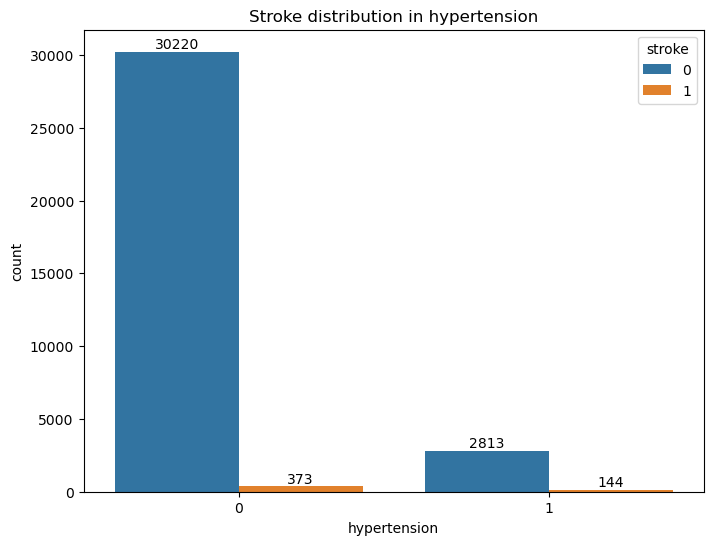

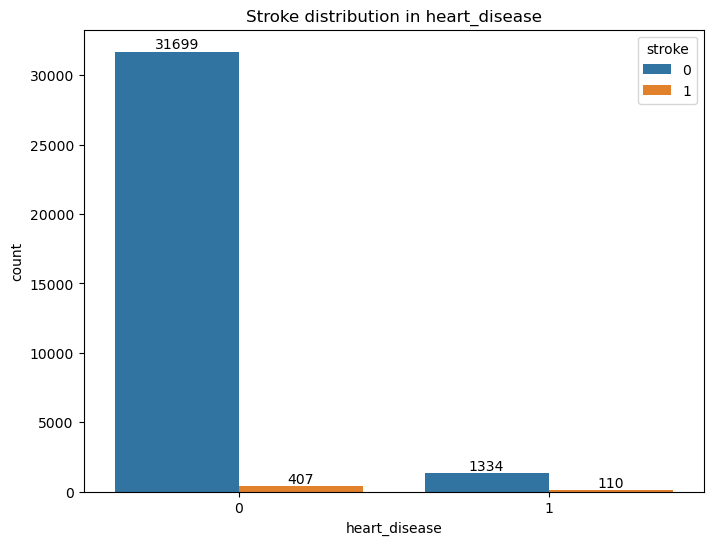

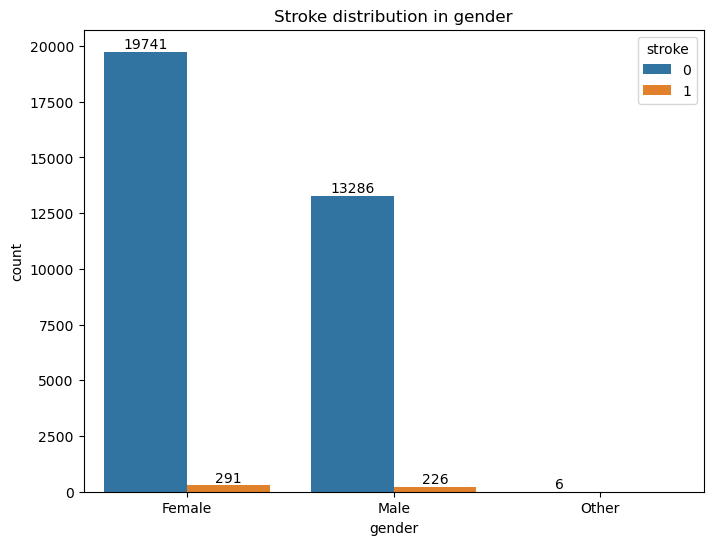

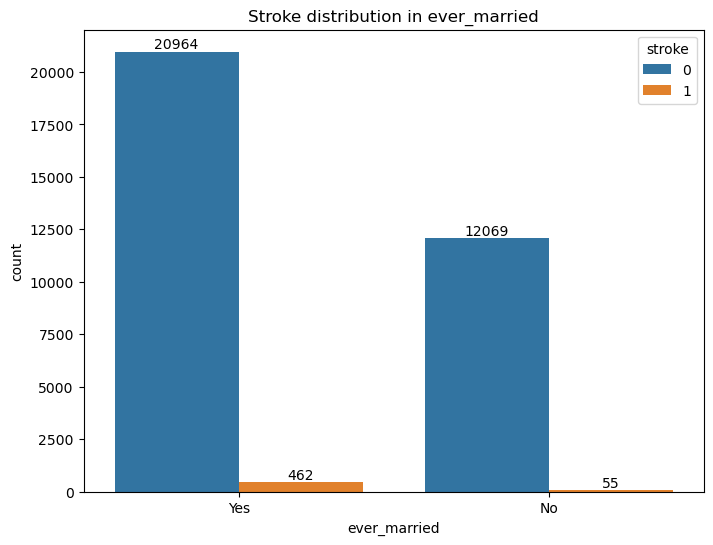

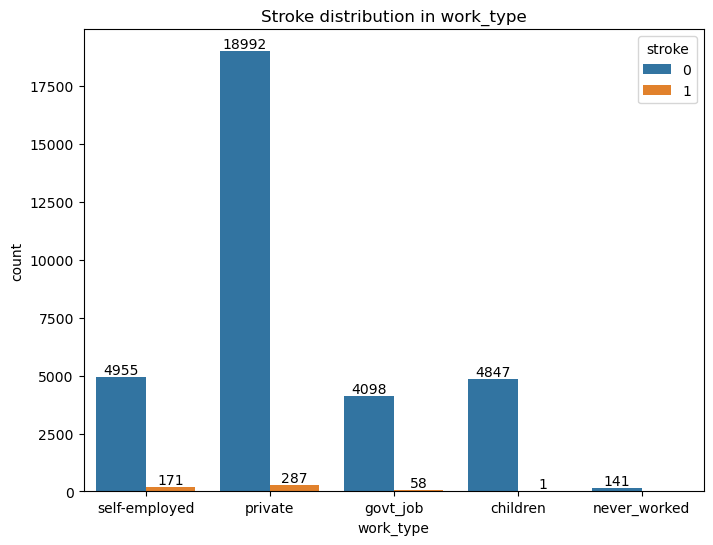

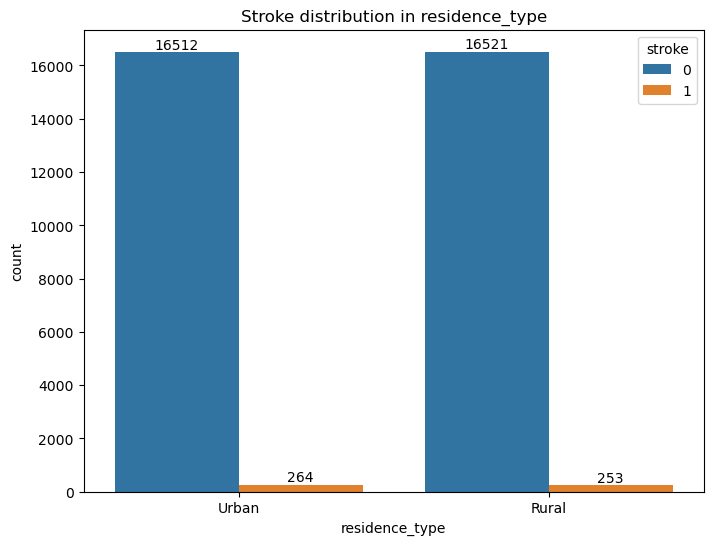

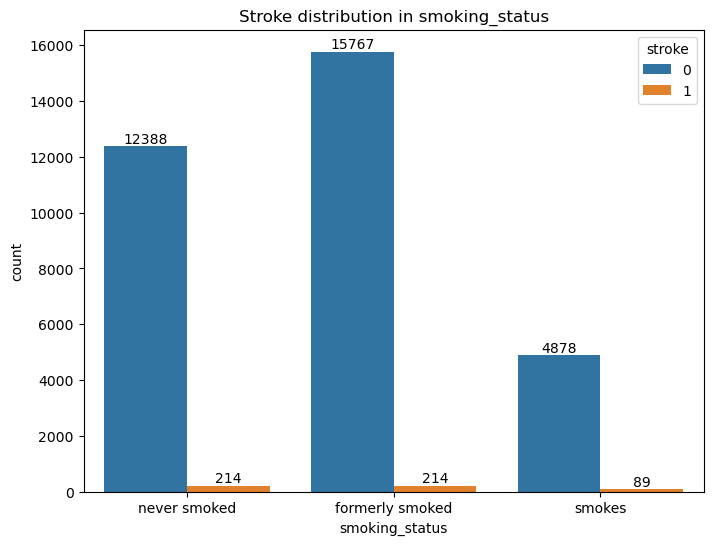

In [44]:
for col in cat_col:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=data, x=col, hue='stroke')

    # Annotate each bar with the count value
    for bar in ax.patches:
        # Get the height of each bar (the count)
        count = int(bar.get_height())
        if count > 0:  # Only annotate bars with count greater than 0
            ax.annotate(f'{count}', 
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                        ha='center', 
                        va='bottom')
    ax.set_title(f'Stroke distribution in {col}')
    # Show plot
    plt.show()

Gender: Er blijkt meer vrouwen te zijn dan mannen die een herseninfarct hebben gekregen. Maar de aantal vrouwen in deze dataset is ook hoger dan de mannen.  
Ever married: Mensen die getrouwd zijn krijgen meer herseninfarct.  
Work type: Mensen die prive werken hebben de hoogste aantal herseninfarct gevallen.  
Residence: Herseninfarct gevallen blijken in beide woongebieden ongeveer hetzelfde te zijn.  
Smoking: Mensen die nooit hebben gerookt hebben hetzelfde aantal herseninfarct gevallen als de mensen die eerder hebben geroken.

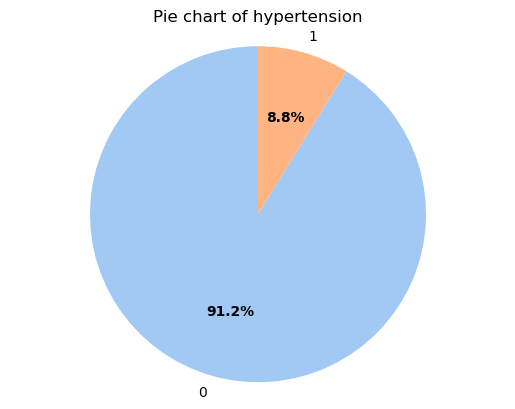

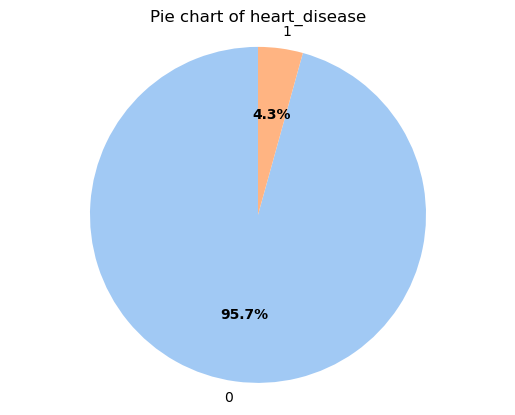

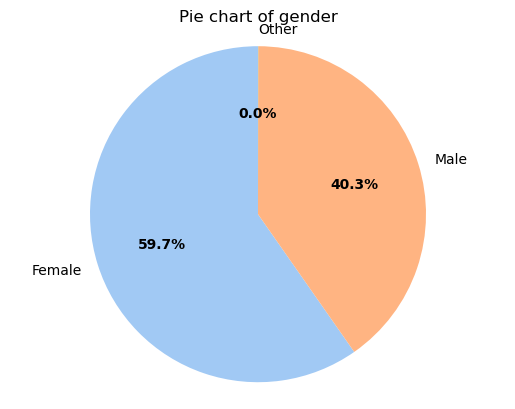

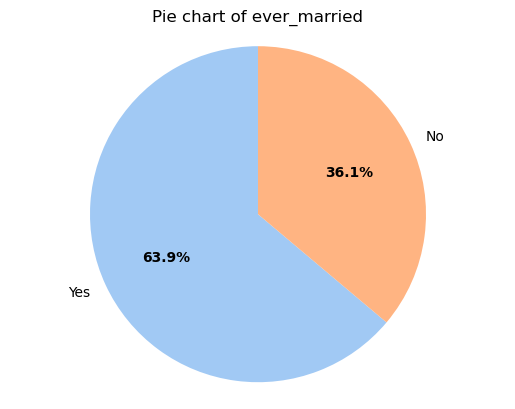

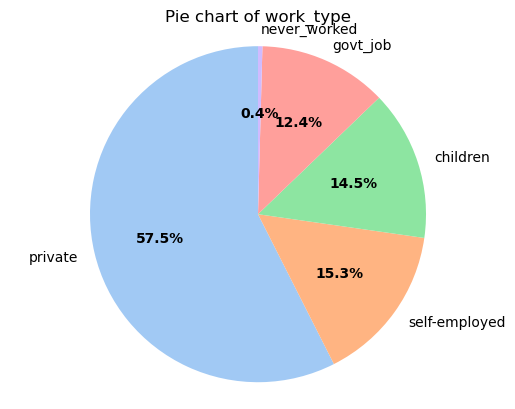

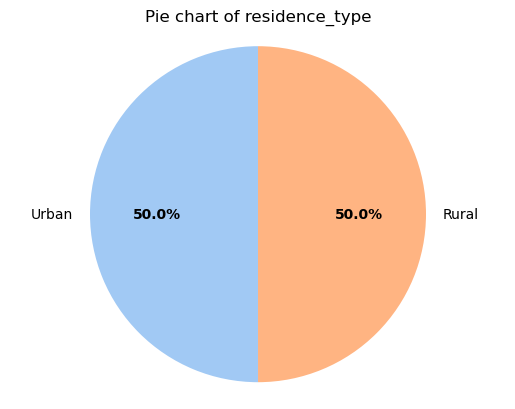

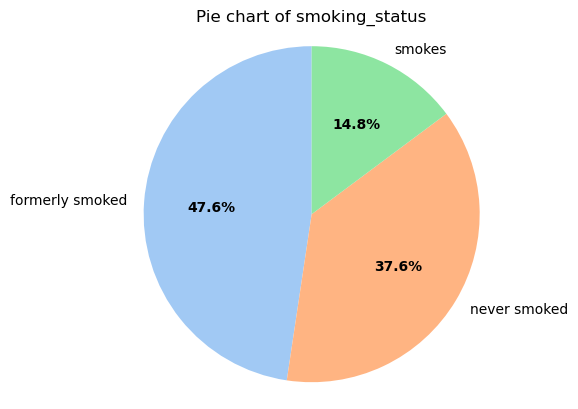

In [45]:
for col in cat_col:
    sizes = data[col].value_counts()
    labels = sizes.keys()
    colors = sns.color_palette('pastel')[:len(labels)]  # Seaborn pastel color palette

    # Plotting the pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(
        sizes.values,
        labels=labels,
        colors=colors,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',  # Show label only if percentage > 0
        startangle=90,
        textprops={'color': 'black'}
    )

    # Formatting
    plt.setp(autotexts, size=10, weight='bold')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f'Pie chart of {col}')
    plt.show()

Gender: Er zijn meer vrouwen dan mannen in deze kolom.  
Married: Er zijn meer getrouwde echtparen dan niet getrouwde.  
Work type: Overgroot deel van deze kolom bestaat uit prive werk typen.  
Residence: Er is evenveel van beide woon typen.  
Smoking: Heel weinig mensen zijn actieve rokers. Meeste mensen hebben wel eerder geroken.

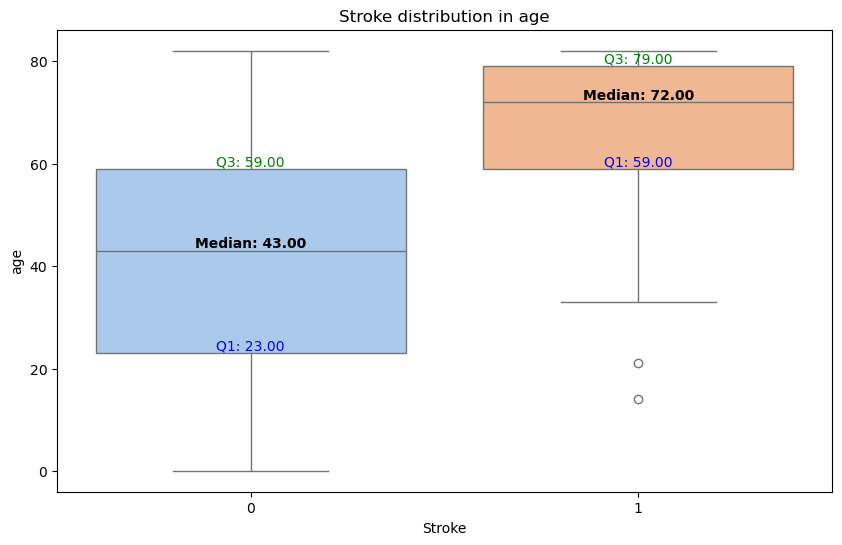

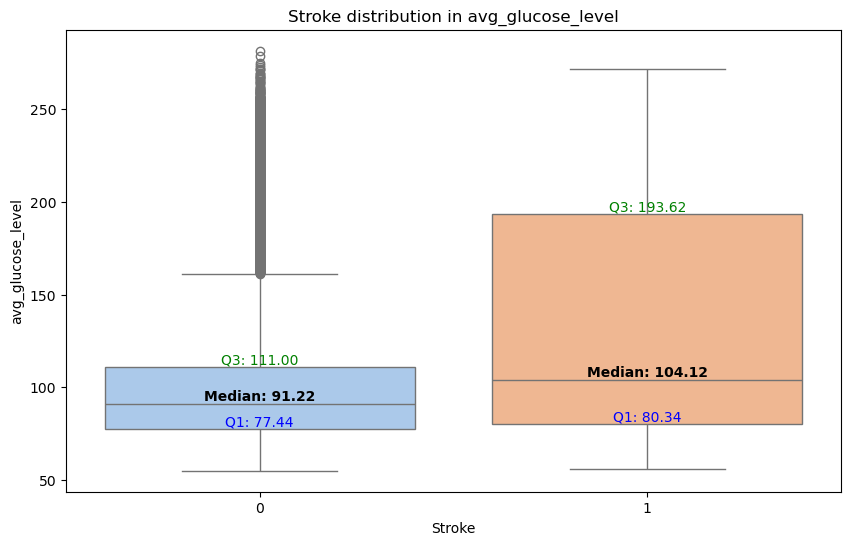

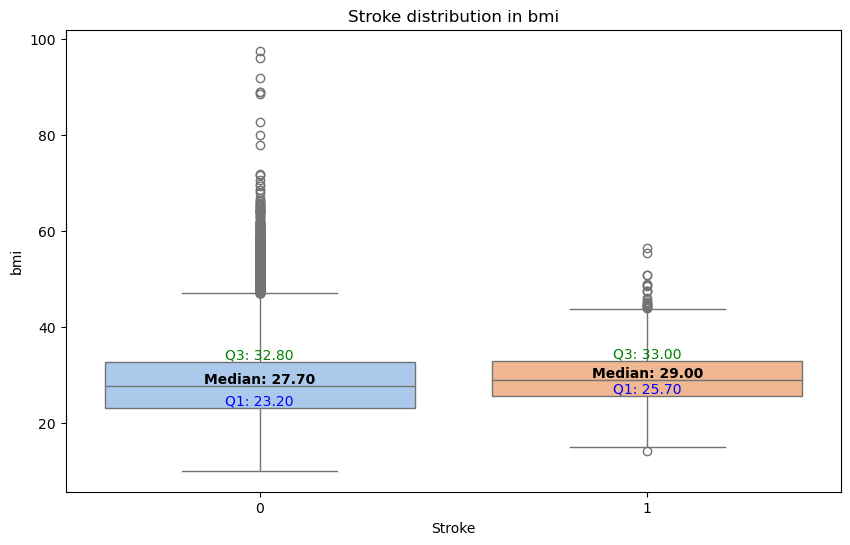

In [46]:
num_col = data.select_dtypes(exclude=['object','bool']).columns.drop('stroke')
for col in num_col:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data=data, x='stroke', y=col, hue='stroke', palette='pastel', legend=False)

    # Calculate and annotate quartiles
    quartiles = data.groupby('stroke')[col].quantile([0.25, 0.5, 0.75]).unstack()

    for tick, (q25, median, q75) in enumerate(zip(quartiles[0.25], quartiles[0.5], quartiles[0.75])):
        # Annotate the 25th percentile
        ax.text(tick, q25, f'Q1: {q25:.2f}', 
                ha='center', va='bottom', color='blue', fontsize=10)
        
        # Annotate the 50th percentile (median)
        ax.text(tick, median, f'Median: {median:.2f}', 
                ha='center', va='bottom', color='black', weight='semibold', fontsize=10)
        
        # Annotate the 75th percentile
        ax.text(tick, q75, f'Q3: {q75:.2f}', 
                ha='center', va='bottom', color='green', fontsize=10)

    # Set plot title and labels
    ax.set_title(f'Stroke distribution in {col}')
    ax.set_xlabel('Stroke')
    ax.set_ylabel(col)

    plt.show()

Age: Mensen die een herseninfarct hebben gekregen hebben relatief een oudere leeftijd.  
Glucose: Mensen die herseninfarct hebben gekregen blijken een hogere glucose gehalte te hebben.  
Bmi: Mensen die wel en geen herseninfarct hebben gekregen blijken wel ongeveer dezelfde bmi te hebben.

Er zijn ongeveer 13.4% aan outliers, waar meeste zitten in avg_glucose_level en bmi.

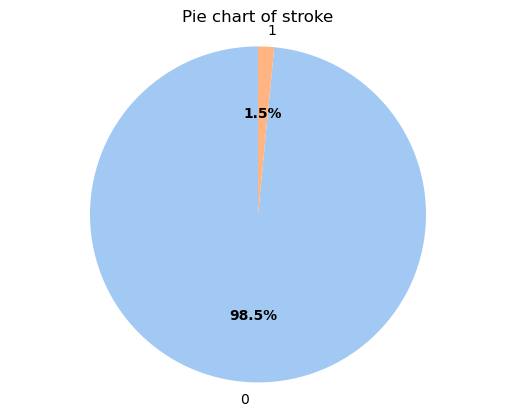

In [47]:
sizes = data['stroke'].value_counts()
labels = sizes.keys()
colors = sns.color_palette('pastel')[:len(labels)]  # Seaborn pastel color palette

# Plotting the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes.values,
    labels=labels,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',  # Show label only if percentage > 0
    startangle=90,
    textprops={'color': 'black'}
)

# Formatting
plt.setp(autotexts, size=10, weight='bold')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Pie chart of stroke')
plt.show()

1.5% van de data heeft wel stroke.

In [48]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,residence_type,smoking_status,stroke
id,,,,,,,,,,,
1,80.0,0,1,67.45,25.6,Female,Yes,self-employed,Urban,never smoked,0
7,44.0,0,0,222.75,19.6,Female,Yes,private,Urban,never smoked,0
8,79.0,0,0,99.23,25.1,Female,Yes,private,Urban,formerly smoked,0
9,44.0,0,0,125.44,35.5,Male,Yes,private,Rural,never smoked,0
10,34.0,0,0,89.11,28.0,Female,Yes,private,Urban,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
72938,40.0,0,0,132.52,40.1,Female,Yes,private,Rural,never smoked,0
72939,34.0,0,0,82.72,26.3,Female,No,private,Urban,formerly smoked,0
72940,2.0,0,0,102.92,17.6,Female,No,children,Urban,formerly smoked,0


**Bevindingen**

Deze dataset bevat informatie over persoonlijke eigenschappen en als de persoon een herseninfarct heeft gekregen.  
Hieruit kunnen we zien dat er heel weinig gevallen van herseninfarct zijn, wat ook betekent dat de dataset imbalanced is.  
Ook is er uitgevonden dat mensen met een oudere leeftijd, en een hoge glucosegehalte eerder kans heeft op herseninfarct.  

## Data Opschonen

We brengen een aantal aanpassingen op de data om te kunnen gebruiken voor machine learning.  
De aanpassingen die we gaan brengen zijn:  
- Outliers weghalen
- Booleans en objects kollomen tot nummerieke kollomen maken.
- Float kollomen standaardiseren.

We hebben ervoor gekozen om de outliers te verwijderen, omdat we willen dat ons model betrouwbare resultaten geeft. Outliers kunnen de nauwkeurigheid van het model verstoren en tot onnauwkeurige voorspellingen leiden. Door ze te verwijderen, zorgen we ervoor dat het model consistente en relevante patronen leert.

In [49]:
# ever_married_No en ever_married_Yes in one column
train['ever_married'] = data['ever_married']
train.drop(columns=['ever_married_No','ever_married_Yes'], inplace=True)

# removing outliers
train = train.drop(train[(train['stroke'] == 0) & (train['avg_glucose_level'] > 161.57)].index)
train = train.drop(train[(train['stroke'] == 0) & (train['bmi'] > 47.2)].index)
train = train.drop(train[(train['stroke'] == 1) & (train['bmi'] < 15.1) | (train['bmi'] > 43.8)].index)
train = train.drop(train[(train['stroke'] == 1) & (train['age'] < 33)].index)
train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,ever_married
id,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,67.45,25.6,1,0,0,0,0,0,1,0,0,1,0,1,0,0,Yes
8,79.0,0,0,99.23,25.1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,Yes
9,44.0,0,0,125.44,35.5,0,1,0,0,0,1,0,0,1,0,0,1,0,0,Yes
10,34.0,0,0,89.11,28.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,Yes
20,36.0,0,0,89.79,27.3,0,1,0,1,0,0,0,0,0,1,0,0,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72938,40.0,0,0,132.52,40.1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,Yes
72939,34.0,0,0,82.72,26.3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,No
72940,2.0,0,0,102.92,17.6,1,0,0,0,0,0,0,1,0,1,0,0,0,0,No


In [50]:
test_data = fusion(test, mappings)
test['ever_married'] = test_data['ever_married']
test.drop(columns=['ever_married_No','ever_married_Yes'], inplace=True)
test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married
id,,,,,,,,,,,,,,,,,,,
32840,52.0,0,0,97.32,21.8,True,False,False,False,False,True,False,False,False,True,False,False,True,Yes
45158,30.0,0,0,227.99,47.7,True,False,False,False,False,True,False,False,False,True,False,False,True,Yes
56105,26.0,0,0,113.28,24.4,True,False,False,False,False,True,False,False,False,True,False,True,False,Yes
3112,24.0,0,0,79.15,21.0,True,False,False,False,False,True,False,False,False,True,True,False,False,Yes
35224,63.0,0,0,89.69,33.3,True,False,False,False,False,True,False,False,False,True,False,True,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60672,24.0,0,0,77.54,25.0,True,False,False,False,False,True,False,False,True,False,False,True,False,No
25989,17.0,0,0,99.99,22.7,True,False,False,False,False,False,True,False,True,False,False,True,False,No
34072,11.0,0,0,80.11,22.2,True,False,False,False,False,False,False,True,False,True,False,False,False,No


In [51]:
TRAIN = train.copy()
TEST = test.copy()

In [52]:
# Encode all object and boolean columns
cols = TEST.select_dtypes(include=['object','bool']).columns
for col in cols:
    encoder = LabelEncoder()
    TRAIN[col] = encoder.fit_transform(TRAIN[col])
    TEST[col] = encoder.transform(TEST[col])
    print(f'{col} Labels:', encoder.classes_)


gender_Female Labels: [0 1]
gender_Male Labels: [0 1]
gender_Other Labels: [0 1]
work_type_Govt_job Labels: [0 1]
work_type_Never_worked Labels: [0 1]
work_type_Private Labels: [0 1]
work_type_Self-employed Labels: [0 1]
work_type_children Labels: [0 1]
Residence_type_Rural Labels: [0 1]
Residence_type_Urban Labels: [0 1]
smoking_status_formerly smoked Labels: [0 1]
smoking_status_never smoked Labels: [0 1]
smoking_status_smokes Labels: [0 1]
ever_married Labels: ['No' 'Yes']


Standardiseren van data betekent om de data gelijk te maken ten opzichte van een schaalverdeling. Soms kan je grote en kleine numerieke waardes hebben vanwege een eenheidsverschil. Het is belangrijk om deze dataset eerst te standardiseren omdat bepaalde modellen gevoelig voor afstanden tussen de datapunten zijn. Bepaalde modellen zoals de KNN en SVM werken met een afstand verschil, maar ook de logistic regression is gevoelig voor coëfficiënten. Grote coëfficiënten kunnen de model ook beïnvloeden, waarbij de modellen slechter kunnen presteren.  
Wij zullen de min max scaler gebruiken omdat de data niet normaal is verdeeld. 

In [53]:
# Standardize all float64 columns
float_cols = TEST.select_dtypes('float64').columns
scaler = MinMaxScaler()
TRAIN[float_cols] = scaler.fit_transform(TRAIN[float_cols])
TEST[float_cols] = scaler.transform(TEST[float_cols])

In [54]:
TRAIN.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,ever_married
id,,,,,,,,,,,,,,,,,,,,
1,0.975586,0,1,0.057399,0.459941,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1
8,0.963379,0,0,0.204033,0.445104,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
9,0.536133,0,0,0.324967,0.753709,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
10,0.414062,0,0,0.157339,0.531157,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
20,0.438477,0,0,0.160476,0.510386,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1
22,0.060059,0,0,0.211323,0.311573,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
23,0.829102,0,0,0.096433,0.347181,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
24,0.877930,0,1,0.270567,0.513353,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1
29,0.536133,1,0,0.286485,0.498516,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1


In [55]:
TEST.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married
id,,,,,,,,,,,,,,,,,,,
32840,0.633789,0,0,0.195220,0.347181,1,0,0,0,0,1,0,0,0,1,0,0,1,1
45158,0.365234,0,0,0.798136,1.115727,1,0,0,0,0,1,0,0,0,1,0,0,1,1
56105,0.316406,0,0,0.268860,0.424332,1,0,0,0,0,1,0,0,0,1,0,1,0,1
3112,0.291992,0,0,0.111383,0.323442,1,0,0,0,0,1,0,0,0,1,1,0,0,1
35224,0.768066,0,0,0.160015,0.688427,1,0,0,0,0,1,0,0,0,1,0,1,0,1
33344,0.523926,0,1,0.193420,0.578635,0,1,0,0,0,0,1,0,0,1,0,0,1,1
35699,0.194336,0,0,0.125686,0.617211,1,0,0,0,0,1,0,0,1,0,0,1,0,0
48440,0.462891,0,0,0.110229,0.451039,1,0,0,1,0,0,0,0,1,0,0,1,0,0
32256,0.279785,0,0,0.081161,0.626113,1,0,0,0,0,1,0,0,1,0,0,1,0,0


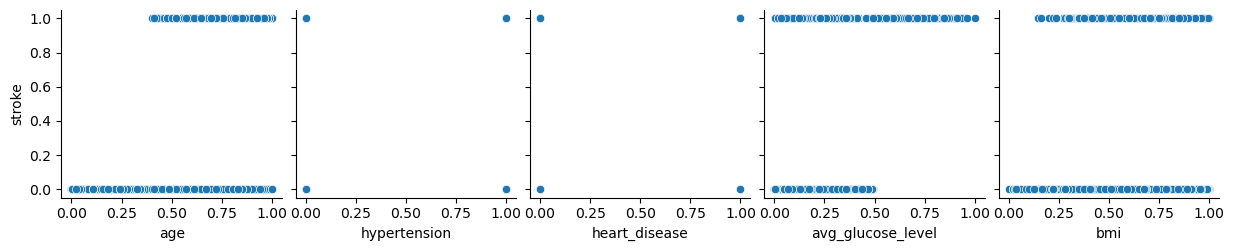

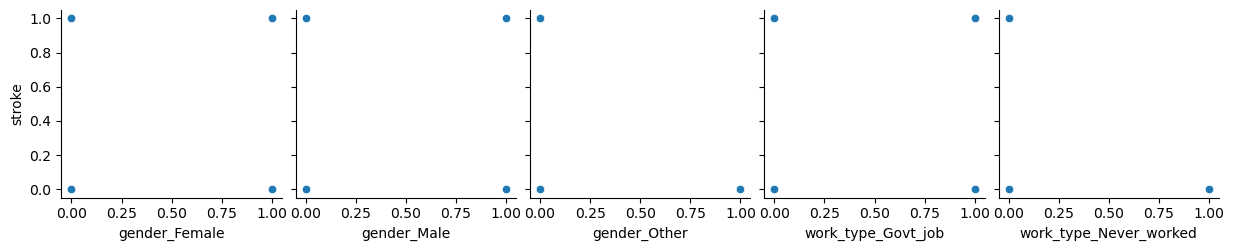

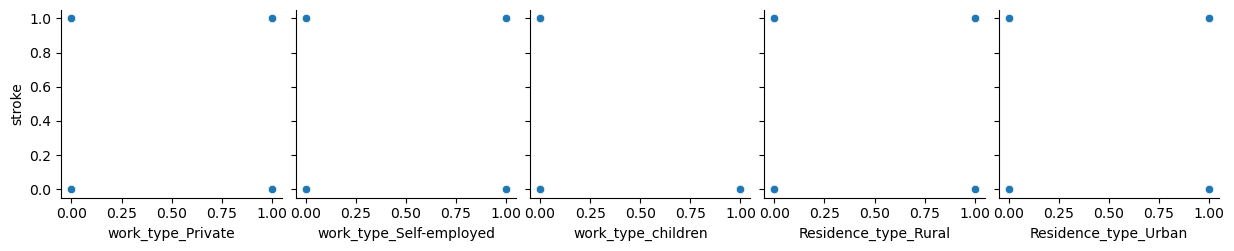

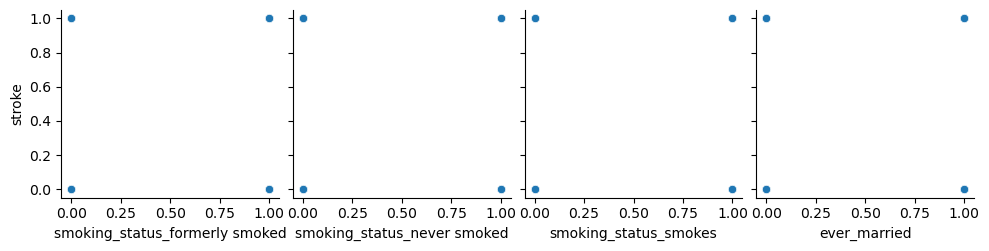

In [56]:
X = TRAIN.drop('stroke', axis=1)
y = TRAIN['stroke']


sns.pairplot(TRAIN, x_vars=X.columns[:5], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[5:10], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[10:15], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[15:], y_vars='stroke')
plt.show()

**Relaties**

De correlaties tussen stroke en andere variabelen zijn over het algemeen zwak, wat aangeeft dat er geen enkele variabele is die sterk voorspellend is voor een beroerte. Hypertension, age, heart_disease en avg_glucose_level hebben de hoogste correlaties met stroke, maar zelfs deze zijn relatief laag. Dit suggereert dat een combinatie van factoren nodig is om het risico op een beroerte nauwkeuriger te voorspellen, of dat er mogelijk aanvullende, niet-gemeten risicofactoren zijn die een sterker verband met beroerte zouden kunnen tonen.

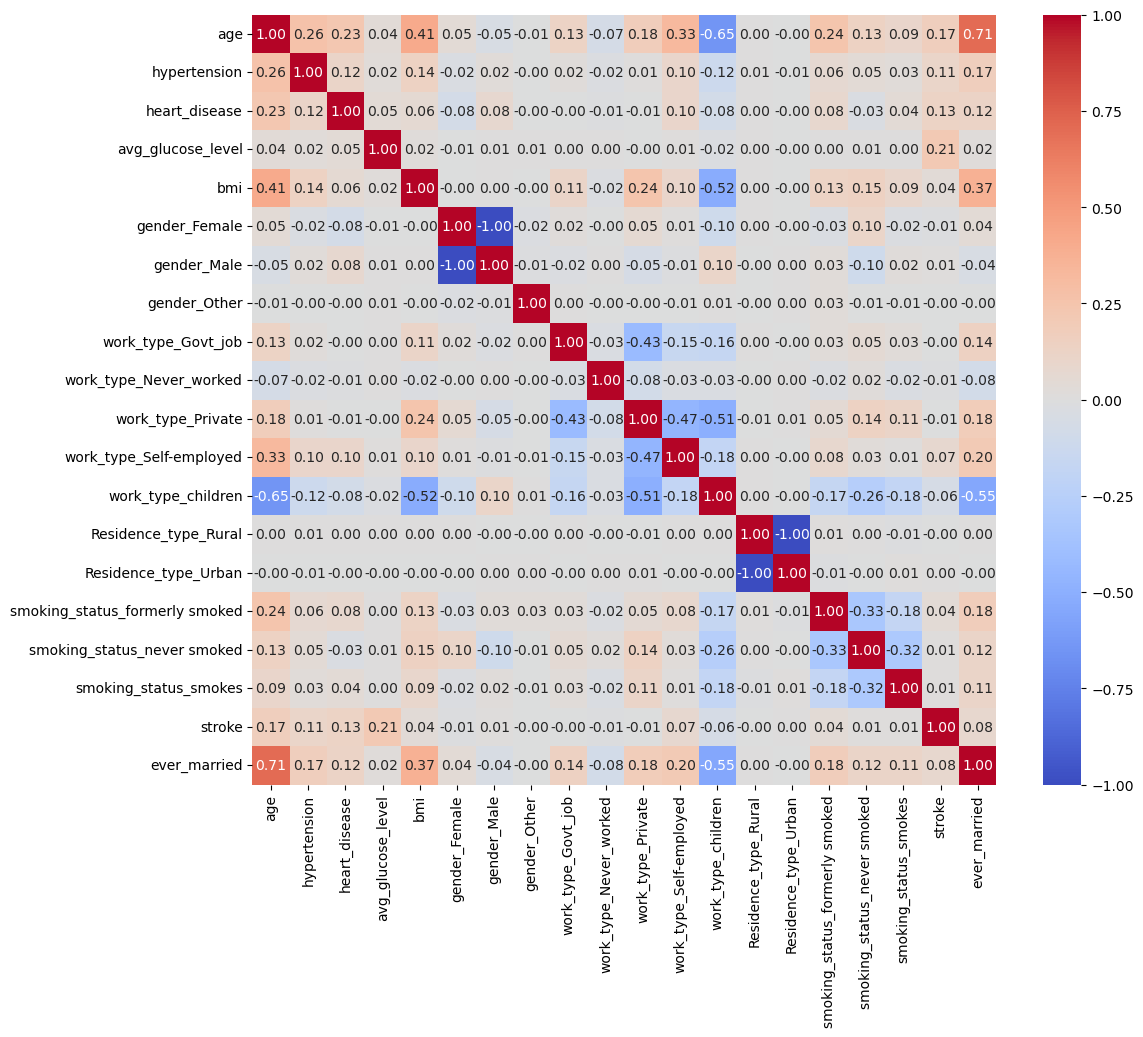

In [57]:
corr = TRAIN.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Evaluatie

Wij hebben in deze opdracht te maken met een classificatieprobleem. Hierbij gebruiken wij de volgende metrics om te bepalen hoe goed een model presteert:


Accuracy : voorspeld het aantal correct geclassificeerde voorspellingen.

precision: Hoeveel van de fraudevoorspellingen zijn daadwekelijke fraude.

recall: hoeveel van de daadwerkelijke fraudegevallen heeft het model gevonden.

f1 : geeft een soort gemmiddelde van recall en precision.

In [58]:
X = TRAIN.drop('stroke', axis=1)
y = TRAIN['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [59]:
# Create Logistic Regression model and show the scores in classification report
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      8567
           1       0.07      0.84      0.13       148

    accuracy                           0.80      8715
   macro avg       0.53      0.82      0.51      8715
weighted avg       0.98      0.80      0.88      8715



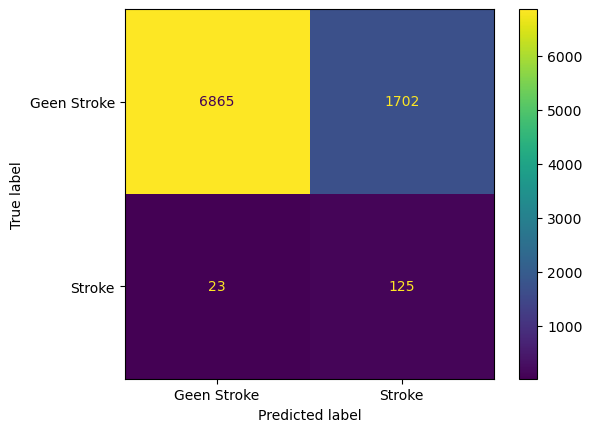

accuracy is 0.802065404475043
precision is 0.06841817186644773
recall is 0.8445945945945946
f1-score is 0.12658227848101267


In [60]:
#confusionmatrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Geen Stroke', 'Stroke'])
cmd.plot()  
plt.show()

# Formules of the metrics and calculation with the confusion matrix
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

accuracy = ((TP + TN)/(TP + TN + FP + FN))
precision = TP / (TP + FP) 
recall = TP / (TP + FN) 
f1_score= 2*precision*recall/(precision + recall)

print('accuracy is',accuracy)
print('precision is',precision)
print('recall is',recall)
print('f1-score is',f1_score)

De F1-score is voor dit vraagstuk de beste maatstaf vanwege de aard van de dataset en het probleem dat we willen oplossen. In dit geval hebben we te maken met een imbalanced dataset, wat betekent dat één klasse  veel minder vaak voorkomt dan de andere. Hierdoor kan het gebruik van nauwkeurigheid (accuracy) misleidend zijn, omdat een model dat vooral de meerderheidsklasse correct voorspelt alsnog een hoge score zou kunnen halen, terwijl het slecht presteert op de minderheidsklasse.

In dit onderzoek is het essentieel dat zowel precision als recall even belangrijk zijn. Precision is belangrijk omdat we willen voorkomen dat er te veel false positives worden gegenereerd; als we ten onrechte voorspellen dat iemand een herseninfarct heeft, kan dat leiden tot onnodige stress en medische kosten. Tegelijkertijd is recall van cruciaal belang om het aantal false negatives te minimaliseren, want als het model een herseninfarct mist, kan dat levensbedreigende gevolgen hebben. 
De F1-score biedt een goede balans tussen precision en recall, vooral wanneer beide even zwaar wegen, zoals in dit geval. Dit maakt de F1-score een geschikte maatstaf om de prestaties van ons voorspellende model voor herseninfarcten te evalueren.


## Modeling

### Class imbalance techniques

We hebben deze technieken gekozen omdat we te maken hebben met ongebalanceerde data, waarbij sommige klassen veel minder voorkomen dan andere, wat kan leiden tot een bevooroordeeld model. Daarnaast verbeteren class weights en SMOTE de nauwkeurigheid door het model te helpen belangrijke patronen in de minderheidsklasse beter te herkennen zonder extra, echte data toe te voegen.

**SMOTE** is een methode om ongebalanceerde datasets in machine learning te behandelen door synthetische voorbeelden te creëren voor de minderheidsklasse. Dit gebeurt door nieuwe data te genereren tussen bestaande punten in de minderheidsklasse, wat helpt om een betere balans tussen klassen te bereiken zonder duplicatie [(Saikat (2024))](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-3-smote).  

We kiezen voor Borderline-SMOTE. Borderline-SMOTE is een variant van SMOTE die zich richt op gegevenspunten dicht bij de beslissingsgrens, omdat deze punten sneller verkeerd geclassificeerd kunnen worden. Door deze punten te oversamplen, kan het model beter omgaan met lastige gevallen.

Er zijn twee soorten:
- Borderline-SMOTE1: Oversampled zowel de minderheids- als de meerderheidsklasse dichtbij de grens.
- Borderline-SMOTE2: Oversampled alleen de minderheidsklasse dichtbij de grens om specifiek de representatie van de minderheidsklasse te verbeteren.  

[(Cornellius Yudha Wijaya, KDnuggets Technical Content Specialist on January 27, 2023 in Machine Learning)](https://www.kdnuggets.com/2023/01/7-smote-variations-oversampling.html#:~:text=7%20SMOTE%20Variations%20for%20Oversampling%201%201.%20SMOTE,...%206%206.%20SMOTE-CUT%20...%207%207.%20ADASYN)

**Class weights** is een methode waarbij de gewichten van de klassen in een ongebalanceerde dataset worden aangepast. Dit zorgt ervoor dat fouten in de minderheidsklasse zwaarder wegen, wat het model dwingt om meer aandacht aan die klasse te besteden zonder extra data toe te voegen [(LogisticRegression, z.d.)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


In [63]:
X = TRAIN.drop('stroke', axis=1)
y = TRAIN['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = BorderlineSMOTE(kind='borderline-2')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

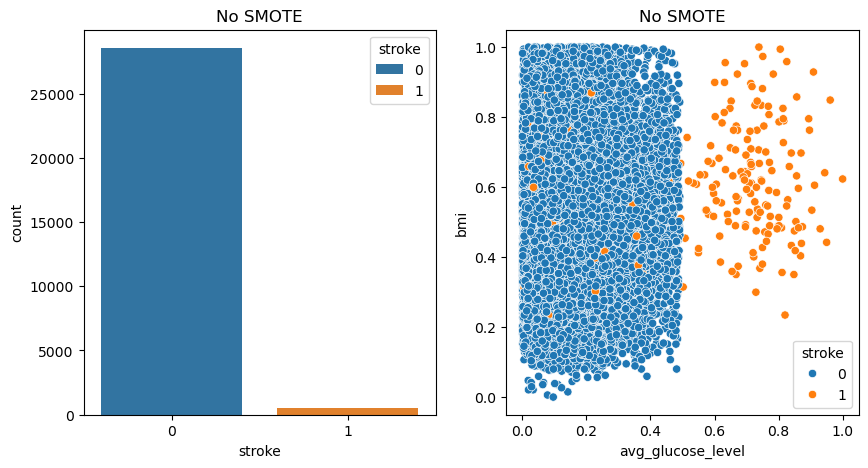

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=TRAIN, x='stroke', hue='stroke', ax=axs[0])
sns.scatterplot(data=TRAIN, x='avg_glucose_level', y='bmi', hue='stroke', ax=axs[1])
axs[0].set_title('No SMOTE')
axs[1].set_title('No SMOTE')
plt.show()

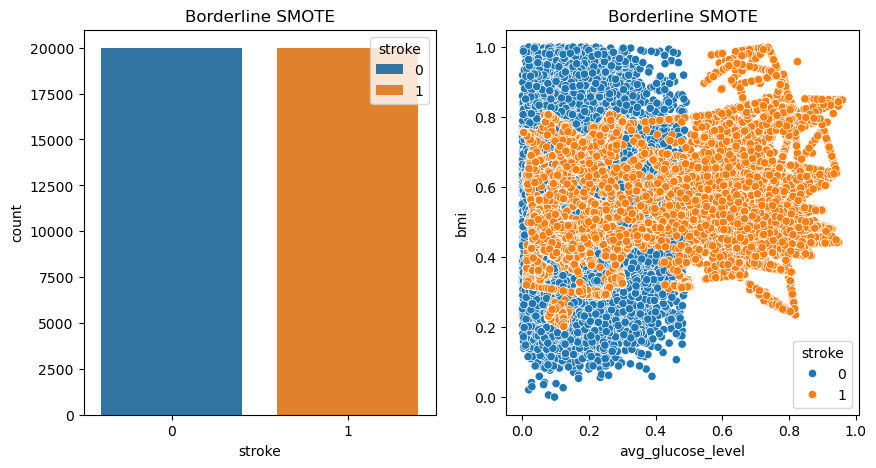

In [80]:
df_bd = pd.DataFrame(X_resampled)
df_bd['stroke'] = y_resampled

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=df_bd, x='stroke', hue='stroke', ax=axs[0])
sns.scatterplot(data=df_bd, x='avg_glucose_level', y='bmi', hue='stroke', ax=axs[1])
axs[0].set_title('Borderline SMOTE')
axs[1].set_title('Borderline SMOTE')
plt.show()

### K-Nearest Neighbors

K-Nearest Neighbors (KNN)  is een eenvoudig, niet-parametrisch algoritme dat zowel voor classificatie als regressie wordt gebruikt. Het algoritme bepaalt de uitkomst door de afstand tussen een nieuw gegevenspunt en bestaande gegevenspunten te berekenen, waarbij de K dichtstbijzijnde buren worden gebruikt om een beslissing te nemen [(Nearest neighbors. (z.d.))](https://scikit-learn.org/stable/modules/neighbors.html). KNN maakt gebruik van deze 'K' dichtstbijzijnde buren om nieuwe gegevenspunten te classificeren of voorspellingen te doen, waarbij het aantal buren dat in aanmerking wordt genomen door de gebruiker kan worden gespecificeerd [(W3Schools.com, z.d.)](https://www.w3schools.com/python/python_ml_knn.asp).

Afstand: Meestal wordt de afstand berekend met de Euclidische of Manhattan afstand, afhankelijk van de data.

- Euclidische afstand: Dit is de directe afstand tussen twee punten in een ruimte en wordt gedefinieerd door de formule:
$$
d_{\text{euclid}}(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$



- Manhattan afstand: Dit is de som van de absolute verschillen tussen de coördinaten van twee punten:
$$
d_{\text{manhattan}}(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

[Singh, A. (2024, 8 oktober)](https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/)


Standaardisatie: KNN maakt gebruik van afstanden om beslissingen te nemen, dus de schaal van de features beïnvloedt de afstandsbepaling sterk. Features met grotere waardes kunnen de uitkomst domineren. Standaardisatie zorgt ervoor dat alle features op een vergelijkbare schaal worden gebracht, doorgaans met een gemiddelde van 0 en een standaarddeviatie van 1, wat voorkomt dat sommige features de afstandsberekeningen domineren [(Deep Dive On KNN: Understanding And Implementing The K-Nearest Neighbors Algorithm, 2023)](https://arize.com/blog-course/knn-algorithm-k-nearest-neighbor/).

Hyperparameters: De belangrijkste parameter is het aantal buren (k). Een lage k-waarde kan zorgen voor overfitting, terwijl een hoge k-waarde het risico op underfitting geeft [(KNN Hyperparameters: A Friendly Guide To Optimization - ProgrammingR, 2023)](https://www.programmingr.com/knn-hyperparameters-a-friendly-guide-to-optimization/).

Regularisatie: Een hogere k-waarde kan helpen om overfitting te verminderen en maakt het model minder gevoelig.

In [ ]:
# KNN-model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(X_resampled, y_resampled)

# Make predictions on X_test
y_pred = knn.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8567
           1       0.76      0.30      0.43       148

    accuracy                           0.99      8715
   macro avg       0.88      0.65      0.71      8715
weighted avg       0.98      0.99      0.98      8715



In [ ]:
knn = KNeighborsClassifier()

# Definieer het parameter grid voor GridSearch

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],                    # Test verschillende aantallen buren
    'weights': ['uniform', 'distance'],                 # Test verschillende gewichten
    'metric': ['euclidean', 'manhattan', 'minkowski']   # Test verschillende afstanden
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
print(f"Beste parameters: {grid_search.best_params_}")

knn_tuned = grid_search.best_estimator_
y_pred = knn_tuned.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Beste parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8567
           1       0.94      0.30      0.45       148

    accuracy                           0.99      8715
   macro avg       0.96      0.65      0.72      8715
weighted avg       0.99      0.99      0.98      8715



### Logistic Regression

Logistic Regression is een lineair classificatiemodel dat niet alleen wordt gebruikt voor binaire classificatie. Echter, het kan ook worden uitgebreid naar multi-klasse classificatie, zoals met softmax-regressie voor meer dan twee klassen [(Furnieles (2022))](https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9). Het belangrijkste idee achter Logistic Regression is om een lineaire beslissing te nemen en deze te transformeren naar een kans met behulp van de sigmoidfunctie [(Binary Classification With Logistic Regression Using PyTorch, 2024)](https://www.datatechnotes.com/2024/03/binary-classification-with-logistic.html#google_vignette). Deze lineaire beslissing kan worden gezien als een grens (decision boundary) die de verschillende klassen scheidt, waarbij de sigmoidfunctie helpt om deze grens om te zetten in waarschijnlijkheden.

**Lineaire decision boundary:**

De basis van Logistic Regression is het creëren van een lineaire decision boundary. De lineaire functie is als volgt:
$$
z = b + w_1 x_1 + w_2 x_2 + \cdots + w_N x_N
$$

Waarbij:

- $z:$ is de log odds.
- $b:$ is de bias of intercept.
- $w_1,w_2,...,w_N:$ de gewichten zijn die het model leert. 
- $x_1,x_2,...,x_N:$ zijn de invoerwaarden.

De lineaire uitvoer $z$ wordt vervolgens door de sigmoidfunctie gehaald om een waarschijnlijkheid te berekenen dat de invoer tot een bepaalde klasse behoort. De sigmoidfunctie wordt gedefinieerd door de formule:
$$
σ(z) = \frac{1}{1 + e^{-z}}
$$
 
Waarbij:

- $σ(z):$ Dit staat voor de sigmoidfunctie, die een inputwaarde $z$ neemt en een waarde tussen 0 en 1 retourneert.
- $e^{-z}:$ Dit is een exponentiële functie waarbij de exponent $−z$ is.
- $z:$ is de log odds
- $1 + e^{-z}:$ Dit is de noemer van de sigmoidfunctie. Door deze term te hebben, wordt de functie zo gedefinieerd dat de uitvoer altijd tussen 0 en 1 ligt.

[(Logistic Regression: Calculating A Probability With The Sigmoid Function, z.d.)](https://developers.google.com/machine-learning/crash-course/logistic-regression/sigmoid-function)

waarbij σ(z) de voorspelde kans is dat de observatie tot klasse 1 behoort. Deze kans ligt tussen 0 en 1. Als σ(z)≥0.5, wordt voorspeld dat de uitkomst tot klasse 1 behoort; anders tot klasse 0 .


[Kumar, A. (2024, 26 augustus)](https://vitalflux.com/python-train-model-logistic-regression/)

[(Wikipedia contributors, 2024b)](https://en.wikipedia.org/wiki/Sigmoid_function)

**Loss-functie:**  

De log loss, ook wel bekend als cross-entropy loss, is de meest gebruikte lossfunctie voor Logistic Regression, met name voor binaire classificatieproblemen. Deze functie speelt een cruciale rol in machine learning-modellen, omdat het de prestatie van een model beoordeelt door de voorspelde kansen te vergelijken met de werkelijke klassewaarden. Log loss straft verkeerde voorspellingen, vooral wanneer het model een hoge waarschijnlijkheid toekent aan de verkeerde klasse. Door de fout tussen de voorspelde kansen en de werkelijke labels te minimaliseren, helpt log loss het model om nauwkeurigere voorspellingen te maken [(Savage Rose Admin, 2021)](https://savagerose.org/nl/binary-cross-entropy-aka-log-loss-de-kostenfunctie-die-wordt-gebruikt-in-logistic-regression/).

De log-loss of binaire cross-entropy loss-functie wordt gedefinieerd als:

$$
L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$$

Waarbij:
- $L(y, \hat{y})$: Dit is de verliesfunctie. Het geeft aan hoe goed het model presteert. Hoe lager de waarde, hoe beter het model de gegevens voorspelt.
- $N$: Het totale aantal voorbeelden in de dataset.
- $y_i$: De echte waarde van het $i$-de voorbeeld. Dit is 0 of 1.
- $\hat{y}_i$: De voorspelde kans dat het $i$-de voorbeeld tot klasse 1 behoort (waarde tussen 0 en 1).

**Uitleg van de termen:**
1. $-\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)$:
   - Dit is het gemiddelde verlies over alle $N$ voorbeelden. Het neemt de som van de individuele verliezen en deelt deze door $N$, zodat je een gemiddeld verlies hebt.

2. $y_i \log(\hat{y}_i)$:
   - Dit deel meet het verlies wanneer de werkelijke waarde $y_i$ gelijk is aan 1. In dat geval wil je dat de voorspelde kans $\hat{y}_i$ ook dicht bij 1 ligt. Als $\hat{y}_i$ groot is (dicht bij 1), zal $\log(\hat{y}_i)$ klein zijn, wat resulteert in een klein verlies. Echter, als $\hat{y}_i$ klein is (dicht bij 0), zal $\log(\hat{y}_i)$ sterk negatief zijn, wat resulteert in een groot verlies.

3. $(1 - y_i) \log(1 - \hat{y}_i)$:
   - Dit deel meet het verlies wanneer de werkelijke waarde $y_i$ gelijk is aan 0. In dat geval wil je dat de voorspelde kans $\hat{y}_i$ dicht bij 0 ligt. Als $\hat{y}_i$ klein is (dicht bij 0), zal $\log(1 - \hat{y}_i)$ groot zijn, wat resulteert in een klein verlies. Echter, als $\hat{y}_i$ dicht bij 1 ligt, zal $\log(1 - \hat{y}_i)$ sterk negatief zijn, wat resulteert in een groot verlies.

([(Megha, 2024)](https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression),[(Logistic Classification With Cross-entropy (1/2), z.d.)](https://peterroelants.github.io/posts/cross-entropy-logistic/))


**Gradient descent:** Het gradient descent-algoritme wordt gebruikt om de parameters van het model te optimaliseren door de kostenfunctie te minimaliseren. De parameters worden aangepast volgens de volgende update-regel:

$$x_{new} = x_{old} - \alpha \frac{dy}{dx}$$

- $x_{new}$: De nieuwe waarde van de parameter x na één update.

- $x_{old}$: De huidige of oude waarde van de parameter x vóór de update.

- α: De learning rate of leersnelheid. 

- ${dy}/{dx}$: De gradient of helling van de functie ten opzichte van x, oftewel de afgeleide van de foutfunctie.

**Rekenvoorbeeld:**

Stel dat iemand een eenvoudige functie wil minimaliseren:
$$y(x) = (x - 3)^2$$

De persoon kiest een beginwaarde voor $x$. Stel dat de startwaarde $x_{old}= 0$ is.

De afgeleide van de functie $y(x)$ is:

$$dy/dx = 2 * (x - 3)$$


Voor $x_{old} = 0$, wordt de afgeleide:
$$dy/dx = 2 * (0 - 3) = -6$$

De persoon past de gradient descent-formule toe om de nieuwe waarde van $x$ te berekenen. Als de leersnelheid $α = 0.1$ is, wordt de nieuwe waarde van $x$ als volgt berekend:

$$x_new = x_old - α * (dy/dx)$$

Dat geeft:

$$x_new = 0 - 0.1 * (-6) = 0 + 0.6 = 0.6$$

Nu is $x_new = 0.6$. De persoon kan deze stap herhalen met deze nieuwe waarde van $x$ totdat de optimale waarde van $x$ is bereikt.




**Regularisatie:** We kunnen L1 of L2 regularisatie gebruiken om te zorgen dat de gewichten klein blijven, zodat het model niet overfit.

**L1-regularisatie (Lasso)**

- L1-regularisatie (Lasso): Voegt de absolute waarden van de gewichten toe aan de loss-functie.
$$
L_{\text{lasso}}(\beta) = L(\beta) + \lambda \sum_{j=1}^{n} |\beta_j|
$$

Waarbij:
- $L(β)$ de originele loss-functie is.
- λ de regularisatieparameter is die bepaalt hoeveel straf er wordt opgelegd voor grote gewichten.
- $\beta_j^2$ de gewichten van de kenmerken zijn.

Effecten:
- Dwingt sommige gewichten naar nul, wat kan helpen bij kenmerkselectie.
- Vermindert de complexiteit van het model, wat helpt bij het voorkomen van overfitting.
- Voorkomt dat het model te sterk past op de trainingsdata.

**L2-regularisatie (Ridge)**

- L2-regularisatie (Ridge): Voegt de kwadraten van de gewichten toe aan de loss-functie.
$$
L_{\text{ridge}}(\beta) = L(\beta) + \lambda \sum_{j=1}^{n} \beta_j^2
$$

Waarbij:
- $L(β)$ de originele loss-functie is.
- λ de regularisatieparameter is.
- $\beta_j^2$ de kwadraten van de gewichten zijn.

Effecten:
- Zorgt ervoor dat gewichten kleiner worden, maar brengt ze niet naar nul.
- Helpt bij het voorkomen van overfitting door gewichten te beperken en zo te zorgen dat het model niet te complex wordt.
- Verkleint de invloed van kenmerken die minder belangrijk zijn, zonder ze volledig te elimineren zoals bij L1.


[(A Gentle Introduction To Logistic Regression And Lasso Regularisation Using R, 2017)](https://eight2late.wordpress.com/2017/07/11/a-gentle-introduction-to-logistic-regression-and-lasso-regularisation-using-r/)


Beide technieken helpen overfitting te verminderen door de complexiteit van het model te beperken.



Regularisatie helpt bij het verminderen van overfitting door de complexiteit van het model te beperken. Het penaliseert grote gewichten, wat ervoor zorgt dat het model zich niet te veel aanpast aan de trainingsdata en beter generaliseert naar nieuwe data ([Favilla, V. (2023, 6 juni)](https://medium.com/@vincefav/regularization-in-logistic-regression-14b50d7cc31)).


Hyperparameters: Bij Logistic Regression zijn de belangrijkste hyperparameters de regularisatieparameter lambda(λ) en het type regularisatie (L1 of L2). Een cross-validation proces kan helpen om de optimale waarde voor lambda(λ) te bepalen, zodat het model goed generaliseert op de gekozen evaluatiemetric ([ChatGPT, V. (2024)](https://chatgpt.com/share/670bcdbb-4574-800e-a27d-a2292ea5c7c4))

In [ ]:
# Logistic Regression model
log_reg = LogisticRegression(class_weight = 'balanced')

log_reg.fit(X_resampled, y_resampled)
y_pred = log_reg.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89      8567
           1       0.07      0.84      0.12       148

    accuracy                           0.80      8715
   macro avg       0.53      0.82      0.51      8715
weighted avg       0.98      0.80      0.87      8715



In [ ]:
log_reg = LogisticRegression(class_weight = 'balanced')

# Definieer het parameter grid voor GridSearch
param_grid = {
    "C": [0.1, 1, 10, 100],  # regularisatie parameter
    "penalty": ["l1", "l2"],  # l1 = Lasso, l2 = Ridge
    "solver": ["liblinear", "saga"],  # optimalisatie algoritme
    "max_iter": [100, 200, 300],  # max aantal iteraties
    "class_weight": [None, "balanced"],  # aanpassing voor ongebalanceerde klassen
}
grid = GridSearchCV(log_reg, param_grid, cv=5, verbose=1)

grid.fit(X_resampled, y_resampled)

y_pred = grid.predict(X_test)

print(f"Beste parameters: {grid_search.best_params_}")
print(f"Beste cross-validation score: {grid_search.best_score_}")

### SVM

Support Vector Machines, oftewel SVM, is een supervised machine learning algoritme dat voornamelijk wordt gebruikt voor classificatie en soms ook voor regressie. Het doel van SVM is om een optimale hypervlak te vinden, ook wel de "decision boundary" genoemd. Deze hypervlak is ontworpen om de afstand tussen verschillende klassen in de dataset te maximaliseren, zodat de nauwkeurigheid van de classificatie wordt verbeterd.SVM kan zowel lineaire als niet-lineaire beslissingsvlakken creëren, afhankelijk  van de data. Wanneer de data lineair scheidbaar is, kan het hypervlak een rechte lijn zijn(besslissinglijn). [(GeeksforGeeks. (n.d.). *Support vector machine algorithm*.)](https://www.geeksforgeeks.org/support-vector-machine-algorithm/).



#### Hypervlak Vergelijking:

$$
\text{Hypervlak} = \mathbf{w}^T \mathbf{x} + b = 0
$$

Waarbij:
- $\mathbf{w}$ de gewichtsvector is,
- $\mathbf{x}$ het datapunt is,
- $b$ de bias-term is.

#### Afstand tussen Datapunt en Hypervlak:

De afstand van een datapunt tot het hypervlak wordt gegeven door:

$$
d(\mathbf{x}) = \frac{|\mathbf{w}^T \mathbf{x}_i + b|}{||\mathbf{w}||}
$$

Waarbij 

-$||\mathbf{w}||$ de Euclidische norm is van de gewichtsvector 
- $\mathbf{w}$ de gewichtsvector is,
- $\mathbf{x}$ het datapunt is,
- $b$ de bias-term is.



### **Kernel Trick**

Wanneer de data niet lineair gescheiden kan worden vanwege de complexiteit, past SVM een techniek toe die bekend staat als de **"kernel trick"**. Een kernel is een functie die helpt de relatie tussen datapunten te modelleren. Met de kernel trick wordt de data omgevormd naar een hogere dimensie, waardoor de data beter scheidbaar kan worden. Wat deze techniek bijzonder maakt, is dat het mogelijk is om een lineair model te passen in deze hogere dimensie zonder dat de data expliciet getransformeerd hoeft te worden. Dit gebeurt door het gebruik van een kernel-functie, die de berekeningen in de oorspronkelijke ruimte uitvoert, terwijl het resultaat overeenkomt met een transformatie naar een hogere dimensie. Hierdoor wordt een lineaire scheiding mogelijk in de nieuwe dimensie, zelfs als de oorspronkelijke data niet lineair scheidbaar is.
[Qiu, J. (2020, July 22)](https://medium.com/@qjbqvwzmg/kernel-methods-in-machine-learning-theory-and-practice-b030bbe0eacc)

#### Types van Kernels:

##### 1. Lineaire Kernel:
Gebruikt bij lineaire data, waarbij een rechte lijn de klassen scheidt. De formule hiervoor is:

$$
\mathbf{w}^T \mathbf{x} + b
$$

Waarbij:
- $\mathbf{w}$ de gewichtsvector is,
- $\mathbf{x}$ het datapunt is,
- $b$ de bias-term is.

##### 2. Polynoom Kernel:
Gebruikt voor gegevens die een polynoomvorm vertonen. De formule is:

$$
(\gamma \mathbf{w}^T \mathbf{x} + b)^N
$$

Waarbij:
- $\gamma$: Schaalparameter die de invloed van de inputvector op de output regelt,
- $\mathbf{w}$: Gewichtsvector,
- $\mathbf{x}$: Datapunt,
- $b$: Bias-term,
- $N$: De graad van de polynoom.

##### 3. Radiale Basisfunctie (RBF) Kernel:
Wordt gebruikt bij niet-lineaire data om deze naar een hogere dimensie te brengen en zo de scheiding te verbeteren. De formule is:

$$
e^{-\gamma ||\mathbf{x}_i - \mathbf{x}_j||^2}
$$

Waarbij:
- $e$: De basis van de natuurlijke logaritme (ongeveer 2.71828),
- $\gamma$: Hyperparameter die de breedte van de RBF-kernel regelt,
- $||\mathbf{x}_i - \mathbf{x}_j||^2$: De kwadratische afstand tussen de datapunten.

##### 4. Sigmoïde Kernel:
Gebaseerd op de sigmoïde functie, en de formule is:

$$
\tanh(\alpha (\mathbf{x}_i \cdot \mathbf{x}_j) + c)
$$

Waarbij:
- $\tanh$: Hyperbolische tangensfunctie,
- $\alpha$: Schaalparameter die de invloed van het innerlijke product regelt,
- $\mathbf{x}_i \cdot \mathbf{x}_j$: Het inwendige product van de datapunten,
- $c$: Een constante die de output van de functie verschuift.







### **Hinge Loss**

De loss-functie die vaak gebruikt wordt bij SVM is de **hinge loss**. Deze functie geeft aan hoe goed het model classificeert.
[Wikipedia(2024, March 19). *Hinge loss*](https://en.wikipedia.org/wiki/Hinge_loss) 


De formule hiervoor is:

$$
L(y) = \max(0, 1 - t \cdot y)
$$

Waarbij:
- $L(y)$: De waarde van de hinge loss, die aangeeft hoe goed het model het datapunt heeft geclassificeerd,
- $t$: De ware klasse van het datapunt (bijvoorbeeld +1 of -1),
- $y$: De voorspelling van het model.






### **Vormen van Regularisatie in SVM**

Bij Support Vector Machines (SVM) zijn verschillende vormen van regularisatie van toepassing. Regularisatie helpt om overfitting te voorkomen door de complexiteit van het model te beperken. De meest gebruikelijke vormen van regularisatie zijn **L2 regularisatie**, **L1 regularisatie**, en in sommige gevallen **Elastic Net regularisatie**. Hieronder worden deze vormen toegelicht aan de hand van wiskundige formules en hun effecten.[(ChatGPT, 2024. Prompt 1: Regularistie in SVM)](https://chatgpt.com/share/670bca27-2dd0-8011-ac64-6321a82a3476)

#### L2 Regularisatie (Ridge Regularisatie)

L2 regularisatie voegt een kwadraat van de gewichten ($\mathbf{w}$) toe aan de kostenfunctie. Dit wordt vaak gebruikt bij lineaire SVM's.

##### Kostenfunctie van een SVM met L2 regularisatie:

$$
\text{Minimiseer} \quad \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

Waarbij:

- $ \mathbf{w} $ de gewichtsvector is die het scheidingsvlak bepaalt.
- $ y_i $ het label is van het $i$-de datapunt ($+1$ of $-1$).
- $ \mathbf{x}_i $ het $i$-de datapunt is.
- $ b $ de bias is.
- $ C $ de regularisatieparameter is die de balans tussen het minimaliseren van de fout en de grootte van de gewichten regelt.

##### Effect van L2 regularisatie:

- **$ \frac{1}{2} ||\mathbf{w}||^2 $**: Dit is de L2 regularisatieterm. Deze term straft grote waarden van de gewichten, waardoor het model minder complex wordt.
- **$ C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b)) $**: Dit is de "hinge loss"-term, die ervoor zorgt dat de punten correct worden geclassificeerd met een marge.

**Effect**: L2 regularisatie zorgt voor een "gladde" oplossing door grote gewichten te bestraffen, wat bijdraagt aan het verminderen van overfitting. Het voorkomt extreem grote waarden voor de gewichten $\mathbf{w}$, maar kan ook onderfitting veroorzaken als $C$ te klein is.

#### L1 Regularisatie (Lasso Regularisatie)

L1 regularisatie voegt de absolute waarden van de gewichten $\mathbf{w}$ toe aan de kostenfunctie. Dit kan leiden tot sparsity, waarbij sommige gewichten precies nul worden.

##### Kostenfunctie van een SVM met L1 regularisatie:

$$
\text{Minimiseer} \quad ||\mathbf{w}||_1 + C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

Waarbij $ ||\mathbf{w}||_1 $ de som is van de absolute waarden van de elementen van $\mathbf{w}$.

##### Effect van L1 regularisatie:

- **$ ||\mathbf{w}||_1 $**: Dit is de L1 regularisatieterm, die gewichten naar nul dwingt, wat leidt tot een sparsere oplossing (feature selectie).
- **$ C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b)) $**: Dit is de standaard "hinge loss"-term van de SVM.

**Effect**: L1 regularisatie resulteert vaak in enkele gewichten die exact nul zijn, wat nuttig kan zijn voor feature selectie. Het model kan echter minder stabiel zijn, vooral als er sterk gecorreleerde features aanwezig zijn.

####  Elastic Net Regularisatie

Elastic Net regularisatie is een combinatie van L1 en L2 regularisatie. Het combineert de sparsity van L1 en de stabiliteit van L2.

##### Kostenfunctie van een SVM met Elastic Net regularisatie:

$$
\text{Minimiseer} \quad \alpha ||\mathbf{w}||_1 + (1 - \alpha) \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

Waarbij $\alpha$ een parameter is tussen 0 en 1 die de balans tussen L1 en L2 regularisatie regelt.

##### Effect van Elastic Net regularisatie:

- Elastic Net combineert de sparsity van L1 (door sommige gewichten naar nul te dwingen) met de robuustheid van L2 (door extreme gewichten te beperken).
- Het is vooral nuttig wanneer de data multicollineariteit bevat, wat betekent dat sommige features sterk gecorreleerd zijn.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Beste parameters zijn: {'C': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
F1-score op training set is: 0.2055302973337434
F1-score op de test set: 0.20257234726688103


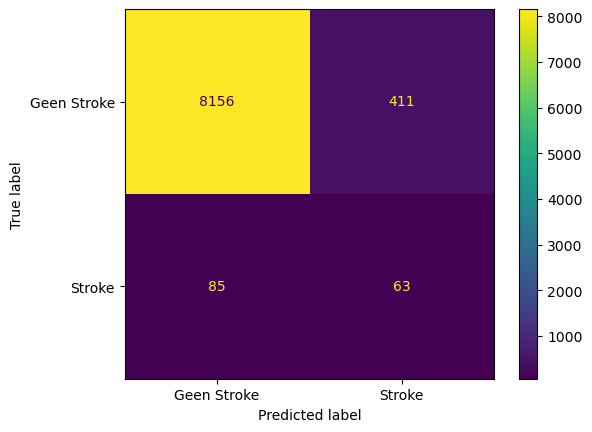

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8567
           1       0.13      0.43      0.20       148

    accuracy                           0.94      8715
   macro avg       0.56      0.69      0.59      8715
weighted avg       0.98      0.94      0.96      8715



In [ ]:
# Support Vector Classifier aanmaken
svm = SVC(probability=True, random_state=42, class_weight='balanced')

# Parameterraster voor de grid search
param_grid = {'C': [0.001,0.01,0.1,0.2,0.5,1,3,5, 10],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto']
              }

# GridSearch aanmaken en fitten aan de trainingsdata
grid_svm = GridSearchCV(svm, param_grid=param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_svm.fit(X_resampled, y_resampled)

# Beste parameters, estimator en f1-score verkrijgen
svm_best_params = grid_svm.best_params_
svm_best_estimator = grid_svm.best_estimator_
svm_best_f1 = grid_svm.best_score_
svm_pred = svm_best_estimator.predict(X_test)
svm_test_f1 = f1_score(y_test, svm_pred)

# Resultaten printen
print("Beste parameters zijn:", svm_best_params)
print("F1-score op training set is:", svm_best_f1)
print("F1-score op de test set:", svm_test_f1)


# Confusion matrix en classification report genereren
cm = confusion_matrix(y_test, svm_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Geen Stroke', 'Stroke'])
cmd.plot()  
plt.show()

# Classification report printen
print(classification_report(y_test, svm_pred))

### Decision Tree

Decision tree is een machine learning model die zowel voor classificatie als regressie problemen worden gebruikt.  


**Werking**: Het model ziet letterlijk uit als een ‘boom’ met daarin knopen (Nodes) , takken (Branches) en bladknopen (Leaf Nodes).
Aan het begin heb je de Root Node waarbij de eerste beslissing wordt genomen aan de hand van de feature.
Daarnaast heb je de branches die de resultaten van de beslissing weergeven. Verder heb je Internal Nodes waarin verdere beslissingen worden gemaakt. De bladknopen (leaf nodes) vertegenwoordigen de uiteindelijke beslissingen of klassen waarin de data is gesplitst.  Ook wordt er gebruik gemaakt van verschillende criteria om te bepalen hoe de data op elk knooppunt wordt gesplitst. De meest voorkomende criteria zijn Gini Impurity en Entropy, die helpen om de data zodanig te splitsen dat de klassen zo goed mogelijk gescheiden worden. De Gini Impurity meet hoe "zuiver" een verdeling van data is in een knoop. Een Gini-waarde van 0 betekent dat alle items in de knoop tot dezelfde klasse behoren (perfecte zuiverheid). Entropy meet de onzekerheid of de "wanorde" in de data. Een hoge entropy geeft aan dat de knoop gemengde klassen bevat. Bij het maken van splitsingen probeert het model om de entropy zo laag mogelijk te maken.  
[(Aznar, 2020)](https://quantdare.com/decision-trees-gini-vs-entropy/)


![Decision Tree](https://miro.medium.com/v2/resize:fit:720/format:webp/1*fGX0_gacojVa6-njlCrWZw.png)  
[Foto: Decision Tree](https://towardsdatascience.com/an-introduction-to-decision-trees-with-python-and-scikit-learn-1a5ba6fc204f)

In deze model is er gebruik gemaakt van de SMOTE methode omdat er een heel lage minderheidsklasse is. Die wordt gebalanceerd door synthetisch data te genereren.  
De beste metrics zijn: 'dt__ccp_alpha': 0.0, 'dt__criterion': 'gini', 'dt__max_depth': None, 
                           'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2, 'dt__splitter': 'best'.  
Beste score: 0.2940280475901306


**Pruning**

De kans op overfitten in deze model is groot. Vandaar dat er een methode is om deze te voorkomen en dat heet Pruning. Pruning houdt in het ‘snoeien’ van de Leaf Nodes zodat de boom niet te veel vertakt. Er zijn 2 soorten pruning en dat zijn namelijk Pre-pruning en Post-pruning. Bij pre-pruning stopt het model bij een bepaald aantal vertakkingen aan de hand van de vooraf gestelde parameters zoals maximum depth. Bij post-pruning worden de takken, die slechte invloed hebben op de accuracy van het model, weggehaald van een boom die maximaal vertakt is om overfitting te voorkomen. Bij pre-pruning is de kans groot op underfitten.  
[(GeeksforGeeks, 2024b)](https://www.geeksforgeeks.org/decision-tree/)

In [ ]:
dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=15, criterion='gini')
dt_model.fit(X_resampled, y_resampled)
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Define the DecisionTreeClassifier with class weighting
dt_model = DecisionTreeClassifier(class_weight='balanced')

# Define the parameter grid for the decision tree
param_grid = {
    'max_depth': [10, 20, 30, None],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10],                # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],        # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']               # Criterion for information gain
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_resampled, y_resampled)

# Find the best parameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions with the best model
dt_tuned = grid_search.best_estimator_
y_pred = dt_tuned.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))

**BEVINDINGEN OVER HET MODEL**

We kunnen zien dat het model vrijwel beter is geworden met de hyperparameter tuning. Zonder hyperparameter tuning was het 0.09, later is de score 0.25 geworden.  
Dit is nogsteeds wel een lage F1 score om te zeggen dat het de beste model is. 

### Ensembles

Ensemble learning is een techniek binnen machine learning waarbij de voorspellingen van meerdere modellen worden gecombineerd om tot een betere prestatie te komen dan een enkel model zou kunnen bereiken. Het idee is om de kracht van verschillende modellen te bundelen door hun resultaten samen te voegen. Elk model heeft zijn eigen sterke en zwakke punten, en door ze te combineren, hopen we de nauwkeurigheid, robuustheid en generalisatie van onze voorspellingen te verbeteren.

Er zijn verschillende methoden om ensemble leren toe te passen:

- Bagging (Bootstrap Aggregating): Dit houdt in dat we meerdere versies van een model trainen op verschillende subsets van de trainingsdata. Deze subsets worden willekeurig geselecteerd met teruglegging, zodat sommige voorbeelden vaker voorkomen en andere juist helemaal niet. Elk model wordt onafhankelijk getraind, en de uiteindelijke voorspelling komt tot stand door bijvoorbeeld meerderheidsstemmen (bij classificatie) of het gemiddelde van de voorspellingen (bij regressie). Een bekend voorbeeld van een bagging-algoritme is Random Forest.

- Boosting: Bij boosting worden modellen na elkaar getraind. Elk nieuw model probeert de fouten van het vorige model te corrigeren door meer nadruk te leggen op de voorbeelden die eerder verkeerd geclassificeerd werden. Algoritmen zoals AdaBoost, Gradient Boosting en XGBoost maken gebruik van deze aanpak.

- Stacking: Stacking is een methode waarbij we meerdere basismodellen gebruiken en hun voorspellingen combineren met behulp van een meta-model. Dit meta-model wordt getraind om de output van de basismodellen zo goed mogelijk samen te voegen om tot een betere uiteindelijke voorspelling te komen.

Door deze technieken toe te passen in ons project, kunnen we het risico op overfitting verminderen en de nauwkeurigheid van ons model verhogen. Ensemble-methoden zijn dan ook populair in de praktijk en worden veel gebruikt bij machine learning-competities, omdat ze vaak betere resultaten opleveren dan individuele modellen.  
[(GeeksforGeeks, 2023e)](https://www.geeksforgeeks.org/a-comprehensive-guide-to-ensemble-learning/)

#### Random Forest

Random Forest is een model geschikt voor zowel classificatie als regressie problemen. Het is een ensemble model die uit meerdere Decision  Trees bestaat. In dit geval hebben we gebruikt gemaakt van de Classifier. Deze model handelt complexe en grote datasets heel goed.  Elk boom bestaat uit een subset van de trainingsdata en ook een willekeurig subset van de features waardoor alle bomen verschillende subsets hebben van de trainset. Bagging (Bootstrap Aggregating) is een techniek om deze verschillende subsets te creëren. Bagging betekent dat er vanuit de originele dataset meerdere subsets van dezelfde grootte als de originele dataset willekeurig worden getrokken MET TERUGLEGGING. Dit betekent dat sommige datapunten in meerdere subsets kunnen voorkomen. Dit maakt het model meer robuust en voorkomt overfitten. Verder worden deze bomen parallel getrained van elkaar, dat betekent dat ze allemaal tegelijkertijd getrained kunnen worden waardoor er minder trainingstijd hiervoor nodig is vergeleken met een model die sequentieel wordt getrained. Om tot een uiteindelijke voorspelling te komen, wordt er een majority voting gedaan. Dit houdt in de meest voorgespelde waarde uit alle bomen wordt uiteindelijk gekozen.  
[(GeeksforGeeks, 2024a)](https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/?ref=header_outind)

![RandomForest](https://media.geeksforgeeks.org/wp-content/uploads/20240130162938/random.webp)  
[Foto: RandomForest](https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/?ref=header_outind)

In [78]:
rf_model = RandomForestClassifier(n_estimators=250, max_depth=10, class_weight='balanced')

rf_model.fit(X_resampled, y_resampled)
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      8567
           1       0.14      0.51      0.22       148

    accuracy                           0.94      8715
   macro avg       0.57      0.73      0.59      8715
weighted avg       0.98      0.94      0.96      8715



In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced')

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 400],        # Number of trees in the forest
    'max_depth': [10, 20, 30, None],             # Maximum depth of the trees
    'min_samples_split': [2, 5, 10, 20],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10],              # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],      # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                   # Whether bootstrap samples are used when building trees
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_resampled, y_resampled)

# Find the best parameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions with the best model
rf_tuned = grid_search.best_estimator_
y_pred = rf_tuned.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      8567
           1       0.24      0.37      0.29       148

    accuracy                           0.97      8715
   macro avg       0.62      0.68      0.64      8715
weighted avg       0.98      0.97      0.97      8715



#### Gradient Boosted Decision Trees


Gradient boosting is een algoritme in machine learning dat voornamelijk wordt gebruikt voor classificatie en ook voor regressie. Het combineert zwakke modellen om een sterker model te creëren; dit wordt ook wel "boosting" genoemd. Tijdens het maken van het nieuwe model probeert het algoritme de fouten van het vorige model te minimaliseren. Bij gradient boosting gebeurt dit door een lossfunctie te definiëren, die de fouten van het model meet. Vervolgens wordt gradient descent gebruikt om na elke stap de loss te minimaliseren. Dit betekent dat elke volgende zwakke model de richting opgaat van de grootste fout van het vorige model, met als doel de voorspellingen steeds beter te maken. Er worden steeds nieuwe modellen aan de ensemble toegevoegd totdat de stopcriteria zijn bereikt. Het doet dit op een sequentiële volgorde, wat betekent dat elk nieuw model afhankelijk is van de prestaties van het vorige model. Hierdoor kan het zijn dat de training van dit model langer duurt dan normaal.
[(GeeksforGeeks, 2023a)](https://www.geeksforgeeks.org/ml-gradient-boosting/)

In [80]:
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01)

gb_model.fit(X_resampled, y_resampled)
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87      8567
           1       0.06      0.85      0.11       148

    accuracy                           0.77      8715
   macro avg       0.53      0.81      0.49      8715
weighted avg       0.98      0.77      0.86      8715



In [81]:
gb_model = GradientBoostingClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 400],        # Number of boosting stages (trees)
    'learning_rate': [0.001, 0.01, 0.1, 0.2],    # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],                      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10, 20],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10],              # Minimum number of samples required at a leaf node
    'subsample': [0.8, 1.0],                     # Fraction of samples used for fitting the individual base learners
    'max_features': ['sqrt', 'log2', None],      # Number of features to consider when looking for the best split
    'criterion': ['friedman_mse','squared_error']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_resampled, y_resampled)

# Find the best parameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions with the best model
gb_tuned = grid_search.best_estimator_
y_pred = gb_tuned.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits
Best Parameters: {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 200, 'subsample': 1.0}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      8567
           1       0.29      0.36      0.32       148

    accuracy                           0.97      8715
   macro avg       0.64      0.67      0.65      8715
weighted avg       0.98      0.97      0.98      8715



#### XGBoost

XGBoost (eXtreme Gradient Boosting) is een krachtig machine learning-algoritme dat goed werkt voor zowel regressie als classificatie. Het combineert meerdere eenvoudige modellen (meestal beslisbomen) om samen een sterk en nauwkeurig model te vormen. XGBoost gebruikt gradient boosting om de fouten steeds verder te verkleinen door het model bij elke stap te verbeteren. Daarbij worden ook technieken toegepast om overfitting te voorkomen, zoals L1- en L2-regularisatie.  
[(GeeksforGeeks, 2023)](https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/)  
XGBoost is een geoptimaliseerde en efficiënte implementatie van Gradient Boosting. Een belangrijke verbetering is de block structure, waar de data gesplitst wordt in blokken, hierdoor kunnen er berekeningen parallel worden uitgevoerd. Voor de features splitsing gebruikt XGBoost de histogram-gebaseerde en de weighted quantile sketch technieken. Bij de histogram-gebaseerde methode worden de splitsingen geëvalueerd op basis van de bins, deze bevatten de waarden van de features die gegroepeerd zijn en de gradients worden verzameld binnen deze bins.  
[(ChatGPT, 2024. Prompt: Gradient Boost vs XGBoost)](https://chatgpt.com/share/6718f8a0-2f44-8000-bf5b-d2639a51e98b)

In [82]:
# Calculate scale_pos_weight
neg, pos = y_train[y_train == 0].shape[0], y_train[y_train == 1].shape[0]
scale_pos_weight = neg / pos    # Increase the weight for positive class (1)

In [83]:
xgb_model = xgb.XGBClassifier(n_estimators=250, 
                              learning_rate= 0.01, 
                              max_depth=30,
                              scale_pos_weight=scale_pos_weight,
                              objective='binary:logistic',
                              eval_metric='logloss'
                              )

xgb_model.fit(X_resampled, y_resampled)
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96      8567
           1       0.10      0.51      0.17       148

    accuracy                           0.92      8715
   macro avg       0.55      0.72      0.56      8715
weighted avg       0.98      0.92      0.94      8715



In [84]:
# Tuning

xgb_model = xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=scale_pos_weight, eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 200, 250, 300],
    'max_depth': [10, 20, 30, 40, 50, None],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'subsample': [0.5, 0.8, 0.9, 1.0],
    'reg_lambda': [0, 1],
    'reg_alpha': [0, 1],
    'colsample_bytree': [0.5, 0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           scoring='f1', 
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

xgb_tuned = grid_search.best_estimator_
y_pred = xgb_tuned.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 7680 candidates, totalling 38400 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.9}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      8567
           1       0.14      0.43      0.21       148

    accuracy                           0.95      8715
   macro avg       0.56      0.69      0.59      8715
weighted avg       0.98      0.95      0.96      8715



### Self-assembled ensemble

Een Voting Classifier is een machine learning-techniek die gebruikmaakt van meerdere modellen om samen een betere en nauwkeurigere voorspelling te maken. Dit is een vorm van ensemble learning, waarbij verschillende basismodellen worden gecombineerd om de prestaties van een model te verbeteren. Het idee hierachter is dat door de voorspellingen van verschillende modellen te combineren, we de bias en variatie kunnen verkleinen en zo de nauwkeurigheid kunnen vergroten.

Er zijn twee soorten voting classifiers:
- Hard Voting: Hierbij wordt de klasse gekozen die het vaakst door de individuele modellen wordt voorspeld. De klasse met de meeste stemmen wordt de uiteindelijke voorspelling.  
- Soft Voting: Hierbij worden de waarschijnlijkheden van elke klasse door de modellen gemiddeld. De klasse met de hoogste gemiddelde waarschijnlijkheid wordt dan als eindvoorspelling gekozen.

In plaats van elk model apart te evalueren, gebruikt de Voting Classifier de gecombineerde kracht van meerdere modellen om een robuustere voorspelling te maken.  
[(GeeksforGeeks, 2023a)](https://www.geeksforgeeks.org/voting-classifier/)  

De modellen gaan we kiezen door middel van de f1-score van de modellen op kaggle.  
We kiezen de soort voting gebaseerd op de cross-validation score.

In [95]:
# Create individual models
svm_clf = svm_best_estimator
rf_clf = rf_tuned
xgb_clf = xgb_tuned

# Create a voting classifier
voting_clf_soft = VotingClassifier(estimators=[
    ('svm', svm_clf),
    ('rf', rf_clf),
    ('xgb', xgb_clf)
], voting='soft').fit(X_resampled, y_resampled)  # 'hard' for majority voting or 'soft' for weighted voting based on probabilities

voting_clf_hard = VotingClassifier(estimators=[
    ('svm', svm_clf),
    ('rf', rf_clf),
    ('xgb', xgb_clf)
], voting='hard').fit(X_resampled, y_resampled)


soft_score = cross_val_score(voting_clf_soft, X, y, cv=10).mean()
hard_score = cross_val_score(voting_clf_soft, X, y, cv=10).mean()

print('Soft score: ', soft_score)
print('Hard score: ', hard_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      8567
           1       0.18      0.42      0.26       148

    accuracy                           0.96      8715
   macro avg       0.59      0.69      0.62      8715
weighted avg       0.98      0.96      0.97      8715



### Naive Bayes

Naive Bayes-methoden zijn een reeks algoritmen voor supervised learning 
die gebaseerd zijn op het toepassen van de stelling van Bayes met de "naïeve" aanname van voorwaardelijke onafhankelijkheid tussen elk paar kenmerken gegeven de waarde van de klassenvariabele. De stelling van Bayes stelt het volgende verband, gegeven klassenvariabele $y$ en afhankelijke kenmerkvector $x_{1}$ tot $x_{n}$:

$$P(y|x_{1},....,x_{n}) = \frac{(P(y)P(x_{1},...,x_{n}|y))} {(P(x_{1},...,x_{n},))}$$

Gebruikmakend van de naïeve veronderstelling van voorwaardelijke onafhankelijheid dat
$$P(x_{i}|y,x_{1}...,x_{i-1}, x_{i+1},....,x_{n}) = P(x_{i}|y),$$

voor alle i, deze relatie is geminimaliseerd tot
$$P(y|x_{1},...,x_{n}) = \frac{(P(y)\Pi_{i=1}^{n})P(x_{i}|y)}{P(x_{1},...,x_{n})}$$

Sinds $P(x_{1},...,x_{n})$ is een constante gegeven de input, kunnen we de volgende classificatie regel gebruiken:

$$P(y|x_{1},...,x_{n}) \propto P(y) \Pi_{i=1}^{n} P(x_{1}|y)$$
<pre>                                                &#8659;</pre>
$$\hat{y} = arg max_{y} P(y)\Pi_{i=1}^{n} P(x_{i}|y),$$

Er zijn 5 soorten Naive Bayes classificaties:
- Gaussian Naive Bayes: wordt gebruikt voor continue features met normale distributie.
- Multinomial Naive Bayes: voor multinomiaal gedistribueerde data. Deze is bekend voor text classificatie, waar er gewerkt wordt met woordvectoren.
- Complement Naive Bayes: is een aanpassing van Multinomial Naive Bayes. Deze wordt meer gebruikt voor imbalanced data. 
- Bernoulli Naive Bayes: wordt gebruikt voor boolean features.
- Categorical Naive Bayes: in dit geval hebben de features (categorische) zijn eigen categorische distributie.

[scikit-learn developers,2007 - 2023: Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

We kiezen voor Complement Naive Bayes, omdat los van dat het met multinomiaal data werkt, ook goed is voor imblanced data.

In [104]:
cnb = ComplementNB(alpha=3.5, norm=True).fit(X_resampled,y_resampled)

cnb_score = cross_val_score(cnb, X_test, y_test, cv=10, scoring='f1').mean()
print(cnb_score)

0.13339285714285715


In [105]:
cnb = ComplementNB()

param_grid = {
    'alpha':[1, 2, 3, 4, 5],
    'force_alpha':[False, True],
    'fit_prior':[False, True],
    'norm':[False, True]
}

grid_search = GridSearchCV(estimator=cnb, 
                           param_grid=param_grid, 
                           scoring='f1', 
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

cnb_tuned = grid_search.best_estimator_
y_pred = cnb_tuned.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'alpha': 5, 'fit_prior': False, 'force_alpha': False, 'norm': False}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.89      8567
           1       0.05      0.62      0.10       148

    accuracy                           0.80      8715
   macro avg       0.52      0.71      0.49      8715
weighted avg       0.98      0.80      0.87      8715



## Results

|Model|f1-score|kaggle score|
|-----|--------|------------|
|KNN|0.45|0.078|
|Logistic Regression|0.12|0.084|
|SVM|0.20|0.109|
|Decision Tree|0.25|0.079|
|Random Forest|0.29|0.09|
|Gradient Boost|0.32|0.085|
|XGBoost|0.21|0.091|
|Voting Classifier|0.26|0.095|
|Naive Bayes|||

In [93]:
def submission(model, file_name='submission'):
    '''Makes prediction on the test data and makes a csv containing the id and predictions.
    This is used to make a csv file to submit in the kaggle competition.

    Parameters:
        model: the trained model.
        file_name (str): name of the csv file. On default: 'submission'
    '''
    y_pred = model.predict(TEST[X.columns])
    copy_test = TEST.copy()
    copy_test['stroke'] = y_pred
    sub = copy_test[['stroke']].reset_index()

    os.makedirs('predictions', exist_ok=True)

    csv_file = f'predictions/{file_name}.csv'
    sub.to_csv(csv_file, index=False)
    print(f'Submission saved to {csv_file}')

In [96]:
# submission(voting_clf_soft, 'voting_clf_soft')

Submission saved to predictions/voting_clf.csv


## Conclusion & Advice

SVM heeft de beste kaggle score gekregen met een score van 0.109, met de parameters:
- C: 0.01
- gamma: auto
- kernel: poly
- class_weight: balanced
- probability: True

SVM blijkt het best te presteren. Mogelijke redenen hiervoor kunnen zijn dat SVM complexe datasets met meerdere features beter handelt omdat het de data kan transformeren naar een hogere dimensie. Hieruit kan je een betere scheiding zien van je data. Verder is het model ook robuust tegen overfitten en ruis. Ook is SVM gericht op de balans tussen recall en precision, waardoor dit verbetert kunt worden.  

Behalve de prestaties van modellen, zijn er andere overwegingen die een rol spelen om een model te kiezen. Een van de deze overwegingen is de complexiteit of grootte van de data. Bepaalde modellen werken niet zo goed op complexe en grotere datasets. Verder is het ook belangrijk dat het model robuust kan zijn voor outliers indien de datasets outliers heeft. Niet alle modellen kunnen makkelijk op nieuwe data getrained worden, dus ook daarmee moet er rekening gehouden worden. Verder is het ook belangrijk in welke context je je model zal uitvoeren. Hierbij is de domeinkennis heel belangrijk. In sommige situaties is het beter om te kijken naar de F1 score dan de Accuracy score.  

Als de artsen willen weten wat van belang zijn, dan adviseren we om decision trees te proberen. Het is transparant, ze bieden een visuele representatie van de beslissingen die leiden tot een voorspelling.

## Sources

- GeeksforGeeks. (2023d, december 6). ML | XGBOOST (eXtreme Gradient Boosting). GeeksforGeeks. https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/

- GeeksforGeeks. (2023b, oktober 11). Voting classifier. GeeksforGeeks. https://www.geeksforgeeks.org/voting-classifier/

- GeeksforGeeks. (2024b, augustus 7). How Does the class_weight Parameter in ScikitLearn Work? GeeksforGeeks. https://www.geeksforgeeks.org/how-does-the-classweight-parameter-in-scikit-learn-work/

- W3Schools.com. (z.d.). https://www.w3schools.com/python/python_ml_knn.asp

- Singh, A. (2024, 8 oktober). KNN algorithm: Introduction to K-Nearest Neighbors Algorithm for Regression. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

- 1.6. Nearest neighbors. (z.d.). Scikit-learn. https://scikit-learn.org/stable/modules/neighbors.html

- KNN Hyperparameters: A Friendly Guide to Optimization - ProgrammingR. (2023, 19 oktober). ProgrammingR. https://www.programmingr.com/knn-hyperparameters-a-friendly-guide-to-optimization/

- Deep Dive on KNN: Understanding and Implementing the K-Nearest Neighbors Algorithm. (2023, 9 juni). Arize AI. https://arize.com/blog-course/knn-algorithm-k-nearest-neighbor/

- Kumar, A. (2024, 26 augustus). Logistic Regression in Machine Learning: Python example. Analytics Yogi. https://vitalflux.com/python-train-model-logistic-regression/

- W3Schools.com. (z.d.-b). https://www.w3schools.com/python/python_ml_logistic_regression.asp

- Favilla, V. (2023, 6 juni). Regularization in logistic regression - Vincent Favilla - medium. Medium. https://medium.com/@vincefav/regularization-in-logistic-regression-14b50d7cc31

- Logistic classification with cross-entropy (1/2). (z.d.). https://peterroelants.github.io/posts/cross-entropy-logistic/

- Binary Classification with Logistic Regression using PyTorch. (2024, 11 maart). https://www.datatechnotes.com/2024/03/binary-classification-with-logistic.html#google_vignette

- A gentle introduction to logistic regression and lasso regularisation using R. (2017, 6 oktober). Eight To Late. https://eight2late.wordpress.com/2017/07/11/a-gentle-introduction-to-logistic-regression-and-lasso-regularisation-using-r/

- GeeksforGeeks. (n.d.). *Support vector machine algorithm*. GeeksforGeeks. https://www.geeksforgeeks.org/support-vector-machine-algorithm/

- Wikipedia contributors. (2024, March 19). *Hinge loss*. In Wikipedia, The Free Encyclopedia. https://en.wikipedia.org/wiki/Hinge_loss

- Qiu, J. (2020, July 22). *Kernel methods in machine learning: Theory and practice*. Medium. https://medium.com/@qjbqvwzmg/kernel-methods-in-machine-learning-theory-and-practice-b030bbe0eacc

- ChatGPT, 2024. Prompt 1: Regularistie in SVM. https://chatgpt.com/share/670bca27-2dd0-8011-ac64-6321a82a3476

- GeeksforGeeks. (2024a, mei 24). Introduction to Resampling methods. GeeksforGeeks. https://www.geeksforgeeks.org/introduction-to-resampling-methods/

- GeeksforGeeks. (2024c, juni 26). How to Calculate Class Weights for Random Forests in R. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-calculate-class-weights-for-random-forests-in-r/?ref=header_outind

- GeeksforGeeks. (2024a, mei 3). SMOTE for Imbalanced Classification with Python. GeeksforGeeks. https://www.geeksforgeeks.org/smote-for-imbalanced-classification-with-python/?ref=header_outind

- GeeksforGeeks. (2024b, mei 17). Decision tree. GeeksforGeeks. https://www.geeksforgeeks.org/decision-tree/

- Duif, M. (2022, 30 maart). An Introduction to Decision Trees with Python and scikit-learn. Medium. https://towardsdatascience.com/an-introduction-to-decision-trees-with-python-and-scikit-learn-1a5ba6fc204f

- GeeksforGeeks. (2023e, december 26). A Comprehensive Guide to Ensemble Learning. GeeksforGeeks. https://www.geeksforgeeks.org/a-comprehensive-guide-to-ensemble-learning/

- GeeksforGeeks. (2023a, maart 31). Gradient boosting in ML. GeeksforGeeks. https://www.geeksforgeeks.org/ml-gradient-boosting/

- ChatGPT, 2024. Prompt 1: Hyperparameters Logistic Regression. https://chatgpt.com/share/670bcdbb-4574-800e-a27d-a2292ea5c7c4

- Megha. (2024, 10 januari). Log Loss vs. Mean Squared Error: Choosing the Right Metric for Classification. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/  

- ChatGPT, 2024. Prompt: Gradient Boost vs XGBoost. https://chatgpt.com/share/6718f8a0-2f44-8000-bf5b-d2639a51e98b

- Logistic regression: Calculating a probability with the sigmoid function. (z.d.). Google For Developers. https://developers.google.com/machine-learning/crash-course/logistic-regression/sigmoid-function

- Wikipedia contributors. (2024b, oktober 22). Sigmoid function. Wikipedia. https://en.wikipedia.org/wiki/Sigmoid_function

- Admin. (2021, 24 november). Log Loss - Logistic Regression’s Cost Function for Beginners | Savage Rose. Savage Rose. https://savagerose.org/nl/binary-cross-entropy-aka-log-loss-de-kostenfunctie-die-wordt-gebruikt-in-logistic-regression/

- Saikat. (2024, 14 oktober). 5 Techniques to Handle Imbalanced Data For a Classification Problem. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-3-smote

- LogisticRegression. (z.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- Aznar, P. (2020, 13 december). Decision Trees: Gini vs Entropy. Quantdare. https://quantdare.com/decision-trees-gini-vs-entropy/

- Cornellius Yudha Wijaya, KDnuggets Technical Content Specialist on January 27, 2023 in Machine Learning. https://www.kdnuggets.com/2023/01/7-smote-variations-oversampling.html#:~:text=7%20SMOTE%20Variations%20for%20Oversampling%201%201.%20SMOTE,...%206%206.%20SMOTE-CUT%20...%207%207.%20ADASYN